In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [63]:
file_path = "data/data1.csv"
df = pd.read_csv(file_path)

In [64]:
len(df.columns)

12

In [65]:
df.corr(numeric_only=True)

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
E_scr_pv,1.000000,0.076881,0.199151,NaN,0.949641,0.302287,-0.253037,-0.064877,-0.002215,-0.205132,NaN
E_scr_sv,0.076881,1.000000,0.042409,NaN,-0.000190,0.025560,-0.089414,-0.771206,0.002047,0.014396,NaN
c_temp_pv,0.199151,0.042409,1.000000,NaN,0.217189,0.297019,-0.008609,-0.029322,-0.081960,-0.055324,NaN
c_temp_sv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k_rpm_pv,0.949641,-0.000190,0.217189,NaN,1.000000,0.315755,-0.320837,0.021859,-0.008747,-0.272435,NaN
k_rpm_sv,0.302287,0.025560,0.297019,NaN,0.315755,1.000000,-0.461216,0.067384,-0.220424,-0.388130,NaN
n_temp_pv,-0.253037,-0.089414,-0.008609,NaN,-0.320837,-0.461216,1.000000,0.123265,0.140688,0.710233,NaN
n_temp_sv,-0.064877,-0.771206,-0.029322,NaN,0.021859,0.067384,0.123265,1.000000,0.001156,-0.009353,NaN
scale_pv,-0.002215,0.002047,-0.081960,NaN,-0.008747,-0.220424,0.140688,0.001156,1.000000,0.115961,NaN
s_temp_pv,-0.205132,0.014396,-0.055324,NaN,-0.272435,-0.388130,0.710233,-0.009353,0.115961,1.000000,NaN


In [4]:
df.isnull().sum()

time         0
E_scr_pv     0
E_scr_sv     0
c_temp_pv    0
c_temp_sv    0
k_rpm_pv     0
k_rpm_sv     0
n_temp_pv    0
n_temp_sv    0
scale_pv     0
s_temp_pv    0
s_temp_sv    0
dtype: int64

In [5]:
new_order = list(df.columns[:9]) + list(df.columns[10:]) + [df.columns[9]]
df = df.reindex(columns=new_order)

In [6]:
df["time"] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143091 entries, 0 to 143090
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   time       143091 non-null  datetime64[ns, UTC]
 1   E_scr_pv   143091 non-null  int64              
 2   E_scr_sv   143091 non-null  int64              
 3   c_temp_pv  143091 non-null  float64            
 4   c_temp_sv  143091 non-null  int64              
 5   k_rpm_pv   143091 non-null  int64              
 6   k_rpm_sv   143091 non-null  int64              
 7   n_temp_pv  143091 non-null  float64            
 8   n_temp_sv  143091 non-null  int64              
 9   s_temp_pv  143091 non-null  float64            
 10  s_temp_sv  143091 non-null  int64              
 11  scale_pv   143091 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4), int64(7)
memory usage: 13.1 MB


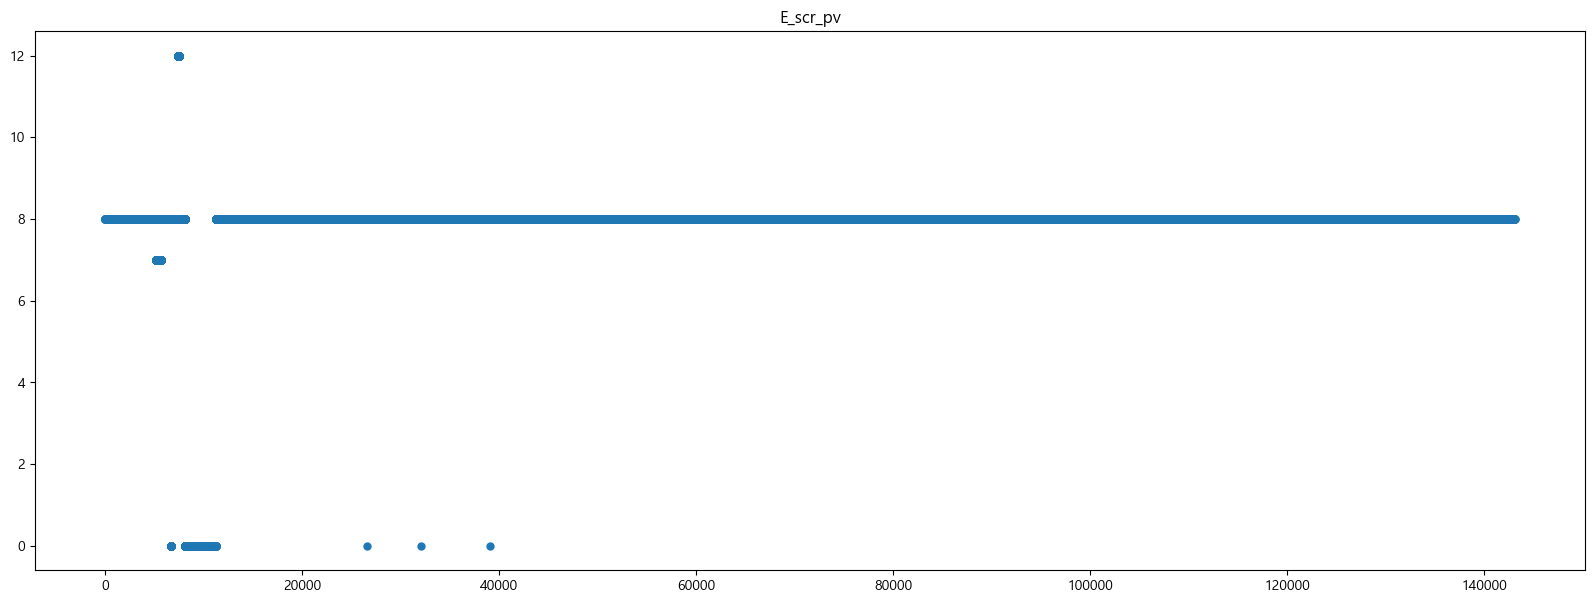

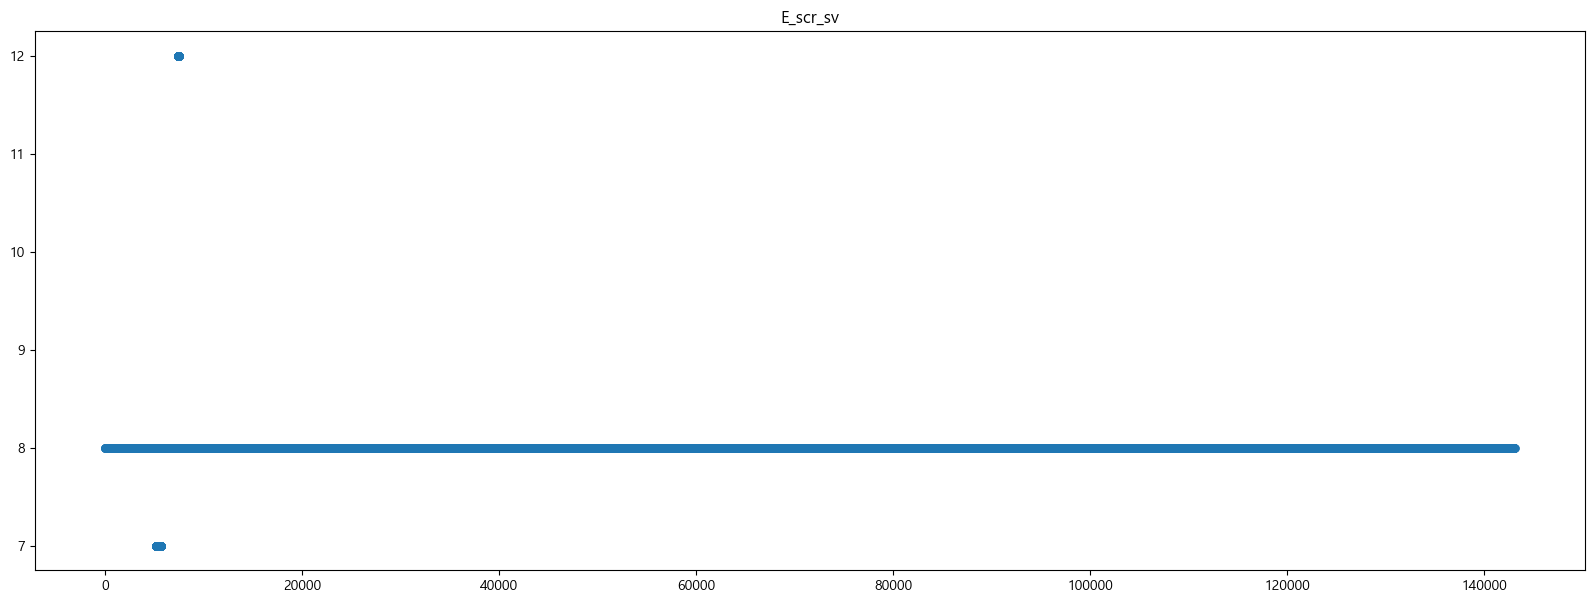

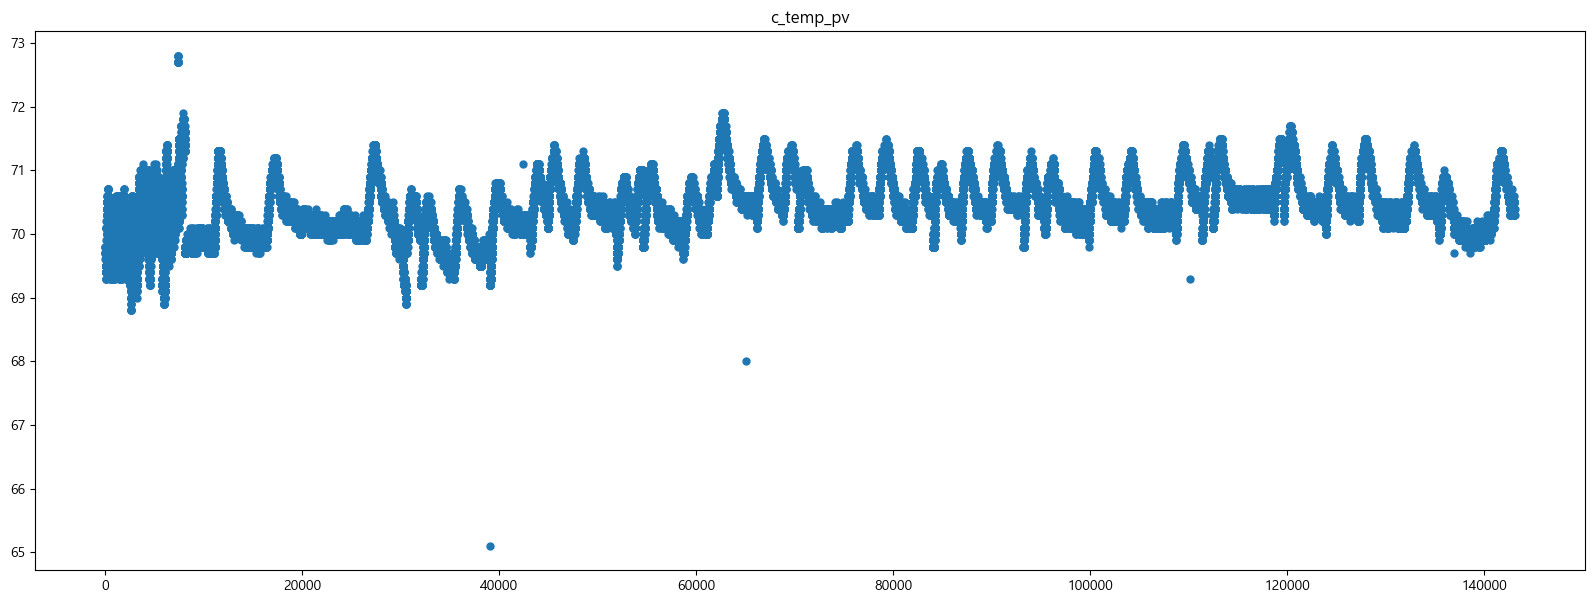

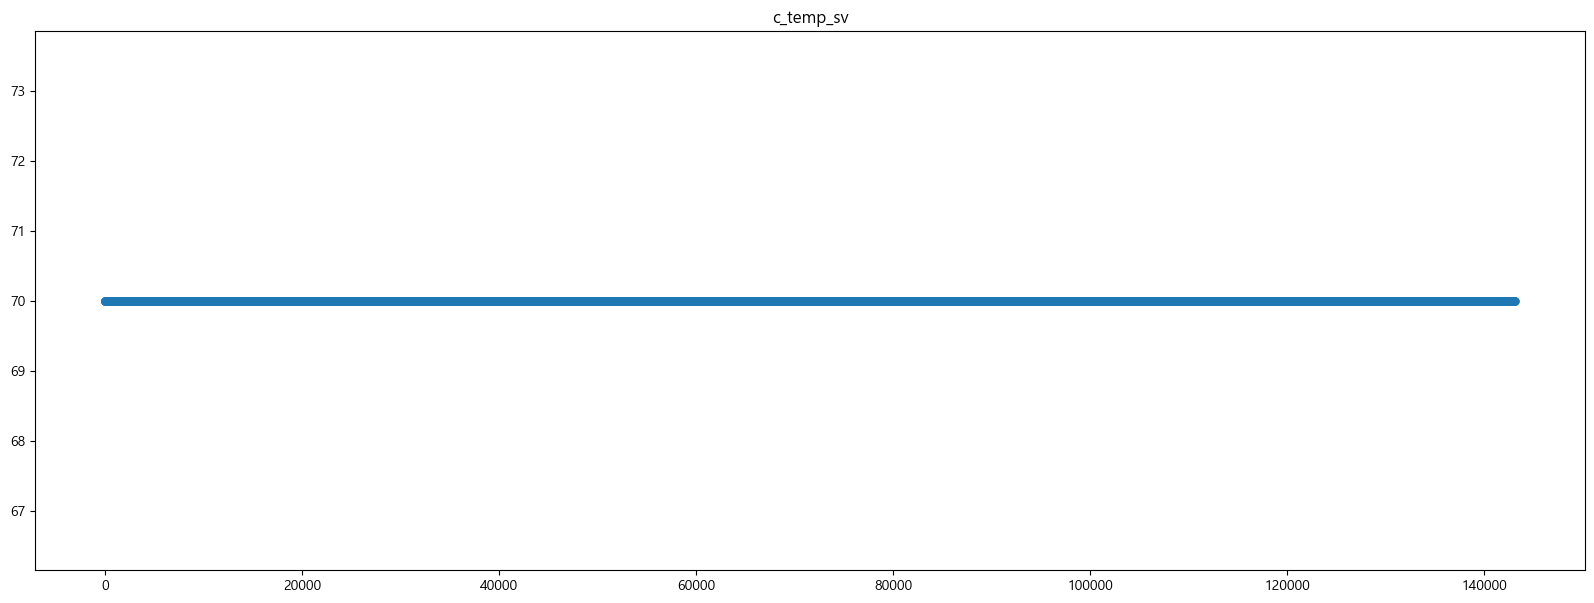

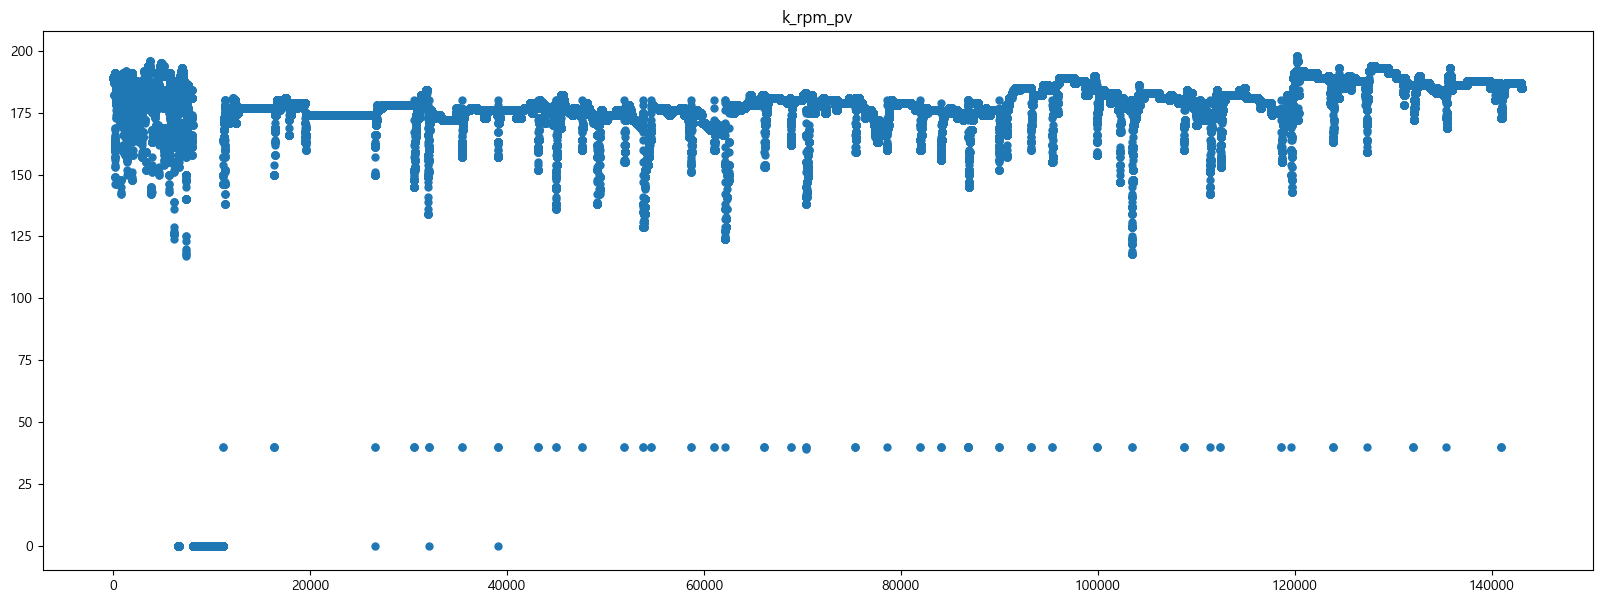

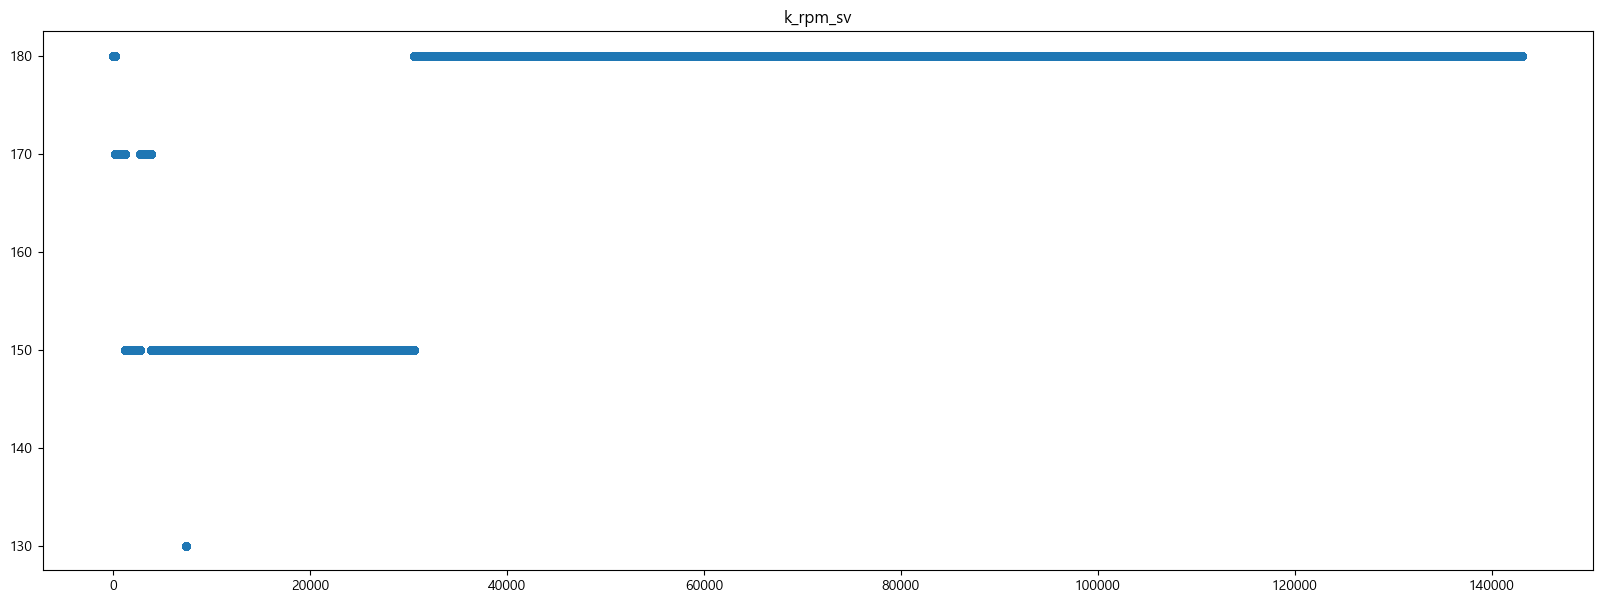

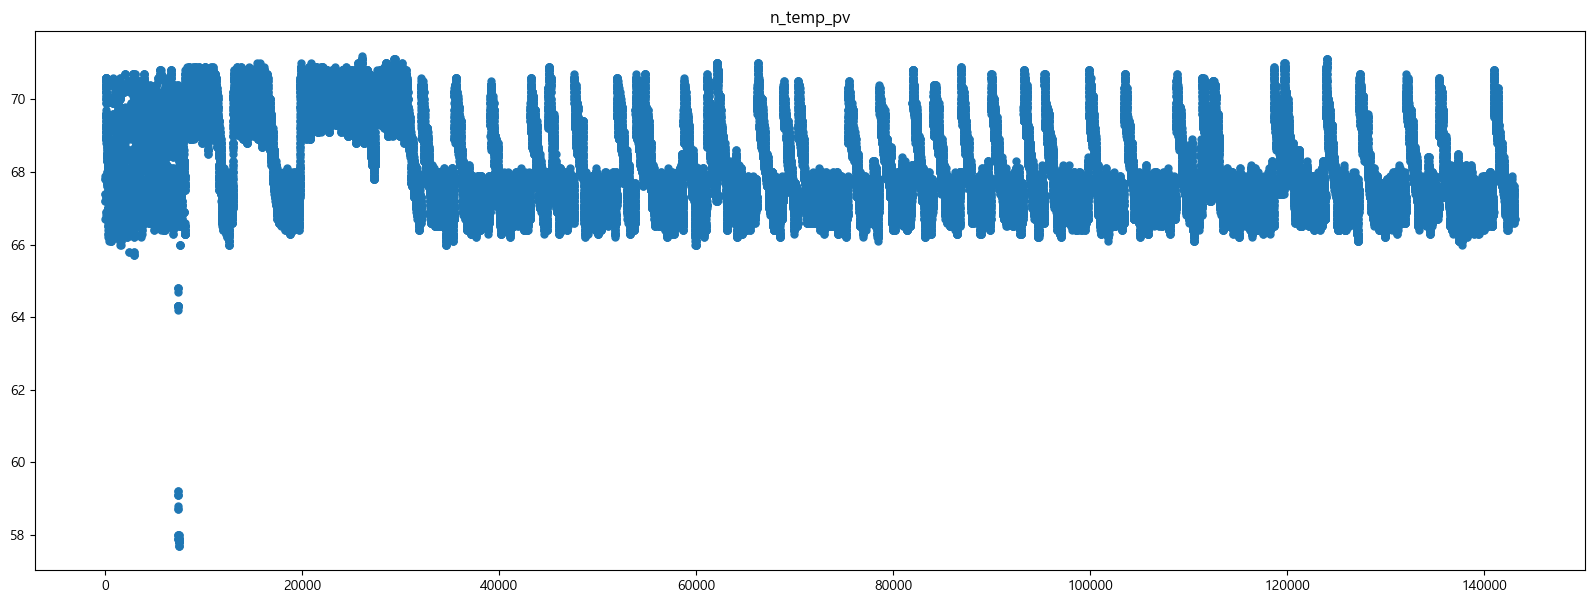

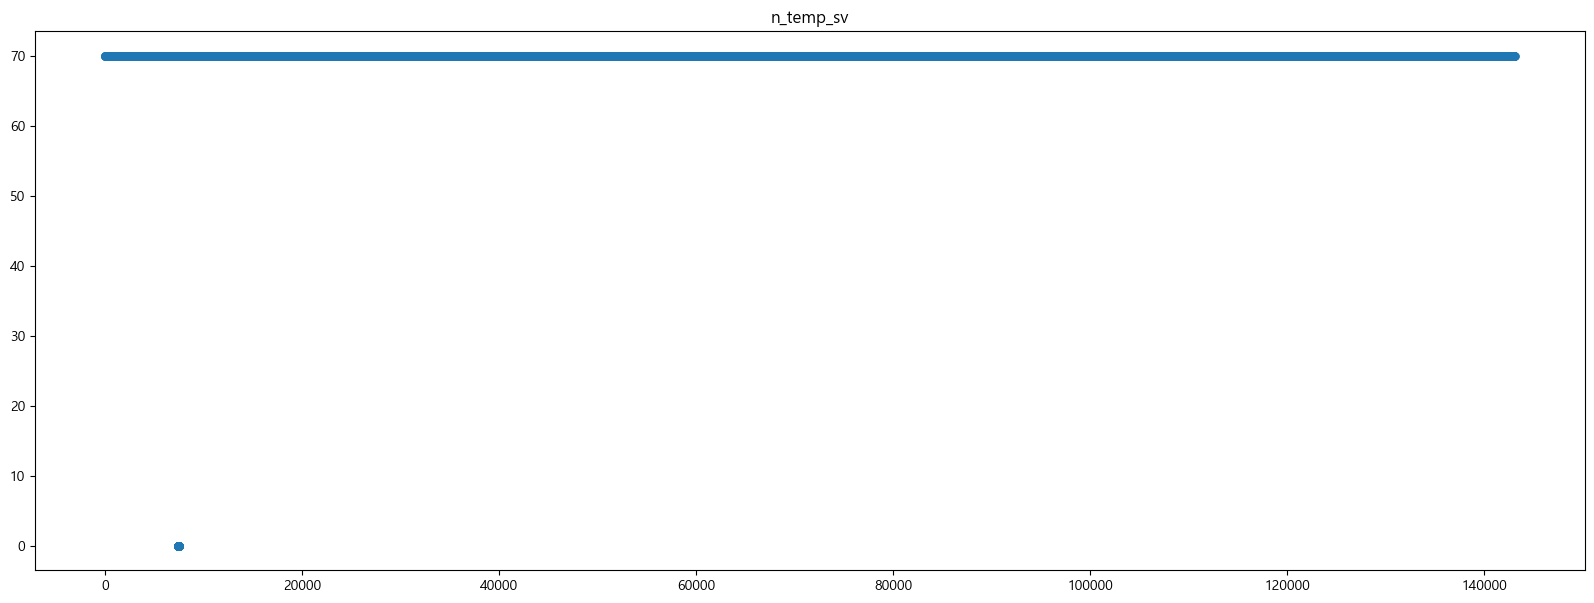

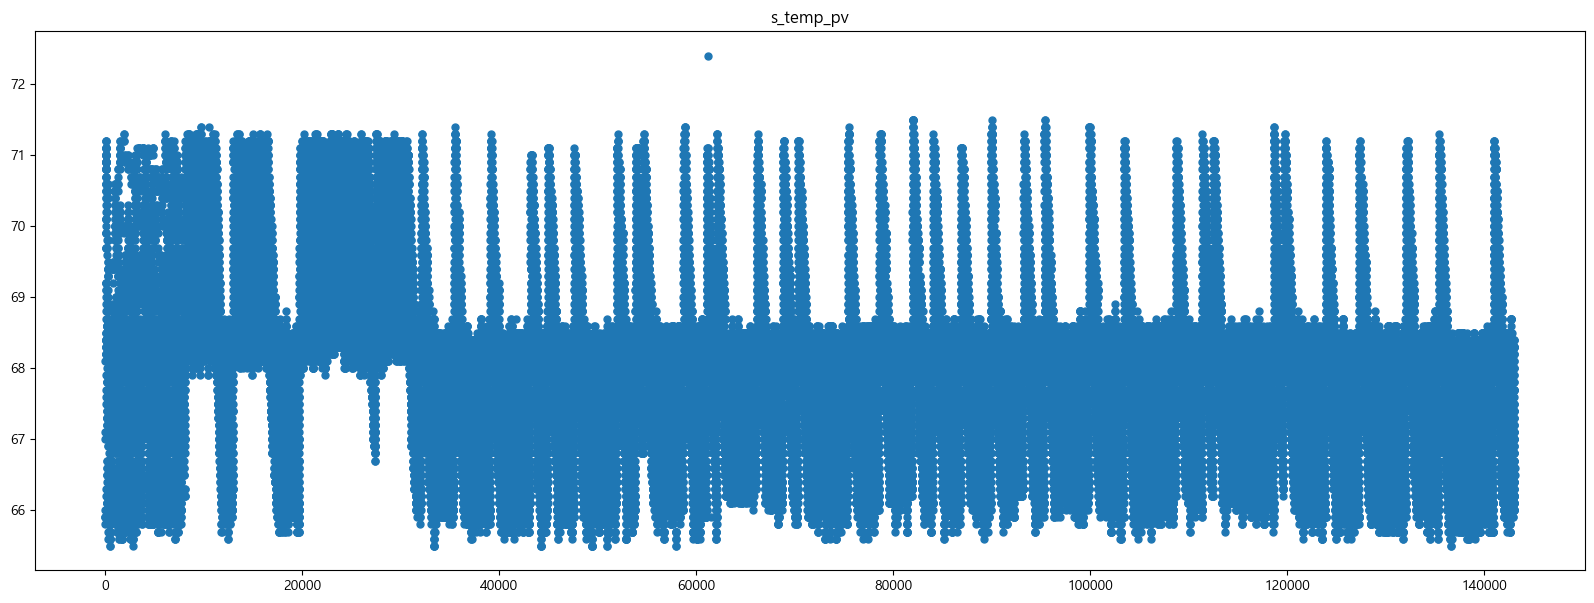

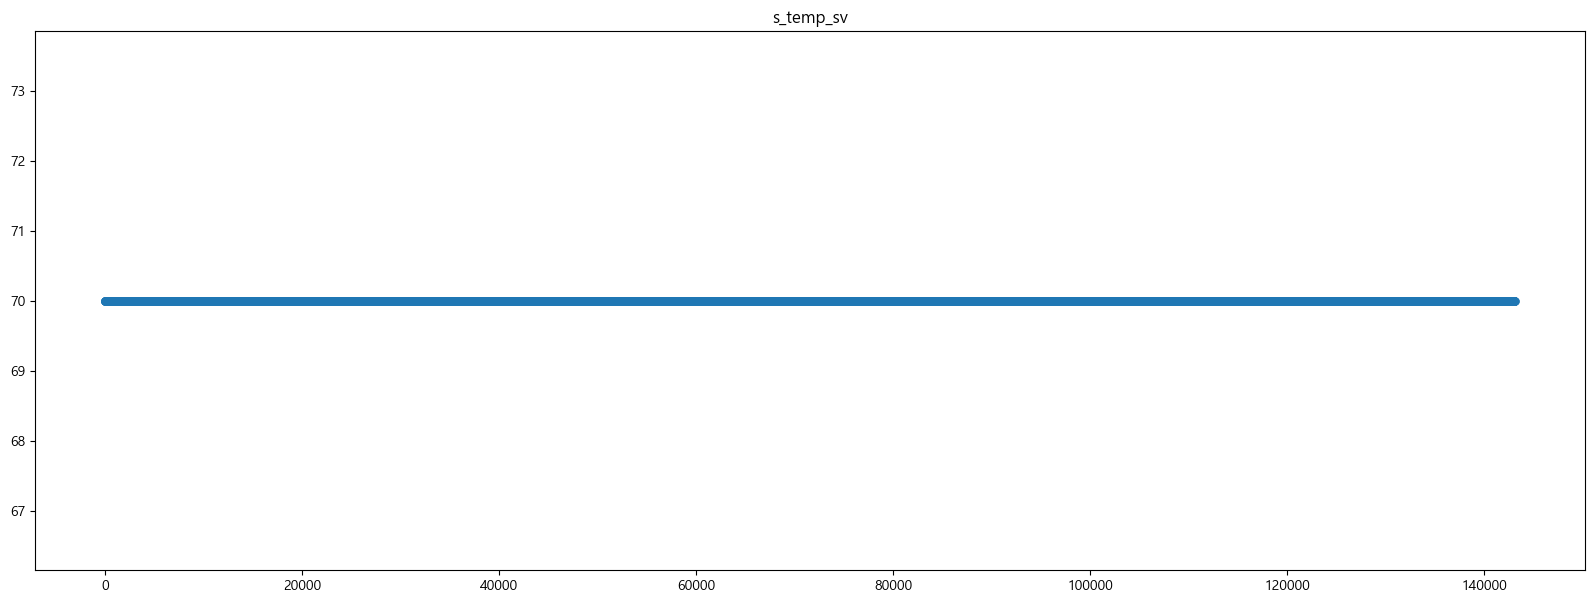

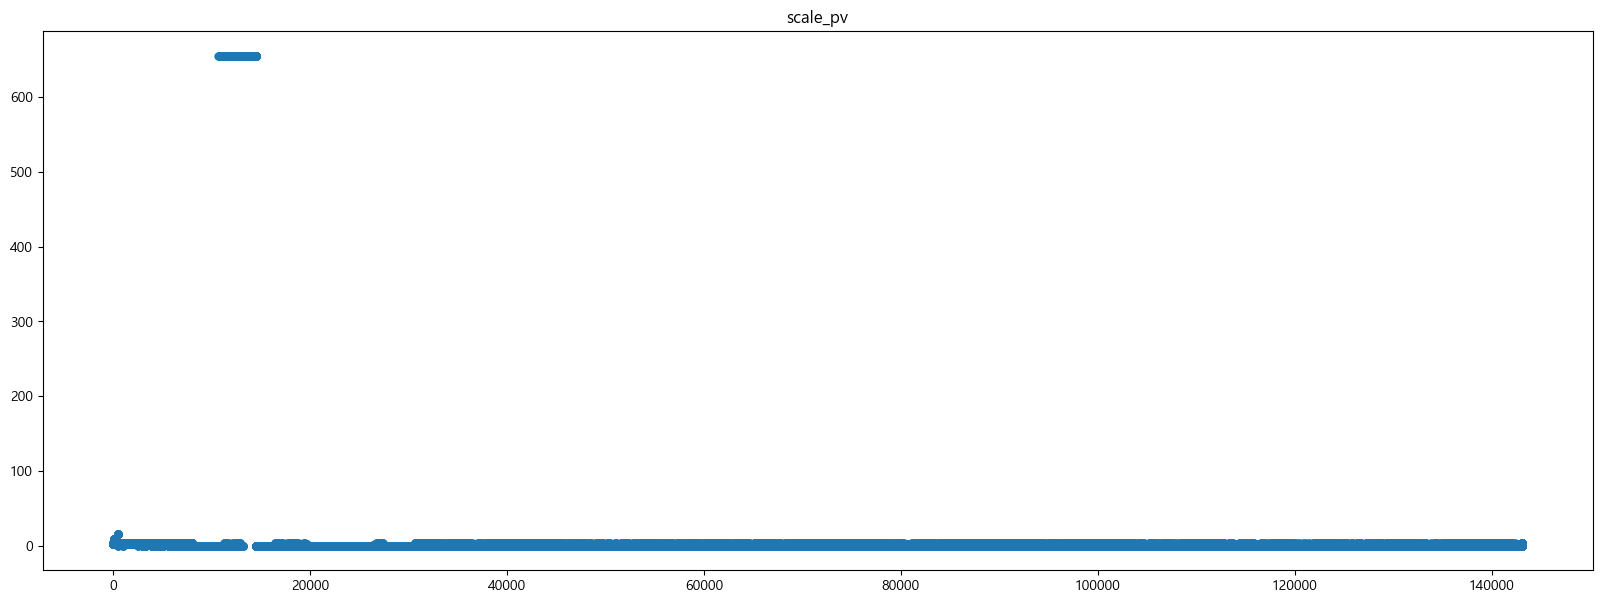

In [7]:
# 그래프로 분포 관찰 
def draw_point(df, *cols):
    if len(cols) == 0:
        for col_name in df.columns[1:]:
            plt.figure(figsize=(20, 7))
            plt.plot(df[col_name],'.', markersize=10) 
            plt.title(col_name)
            plt.show()
    else:
        for col_name in cols:
            plt.figure(figsize=(20, 7))
            plt.plot(df[col_name],'.', markersize=10) 
            plt.title(col_name)
            plt.show()
            
# plt.plot(df["E_scr_pv"])
draw_point(df)

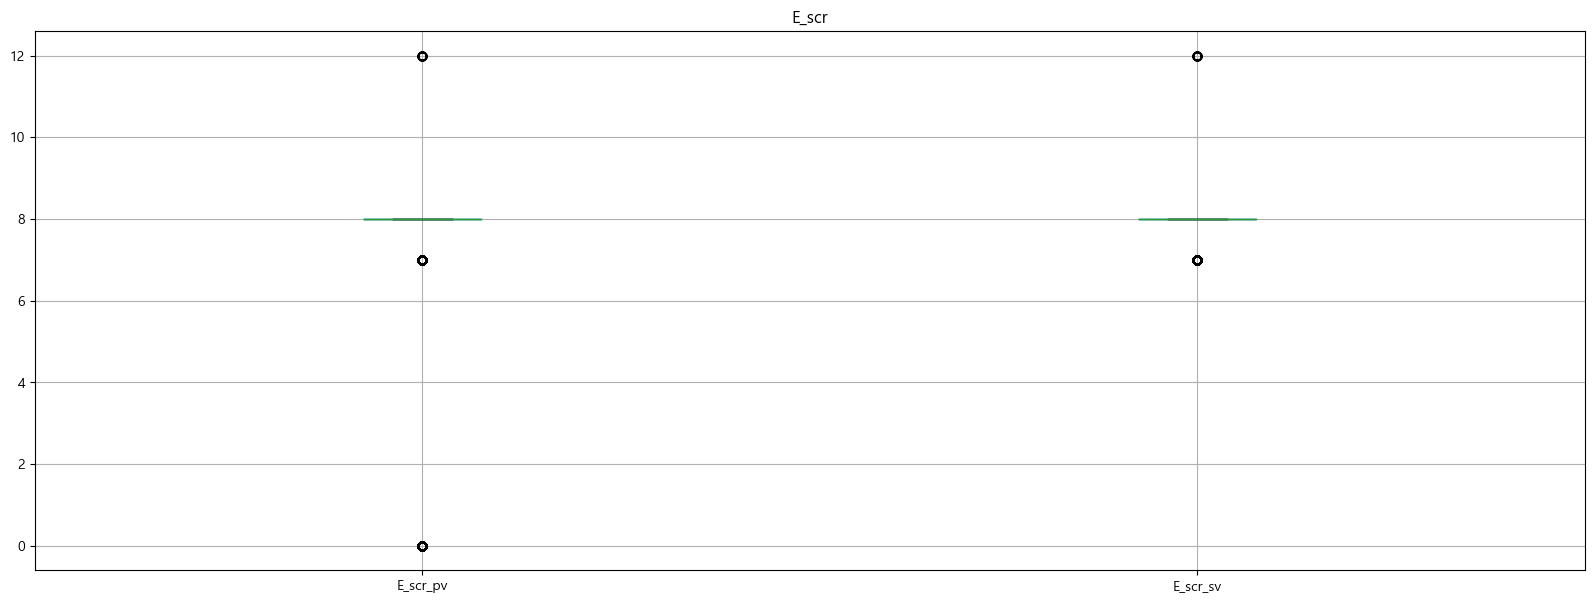

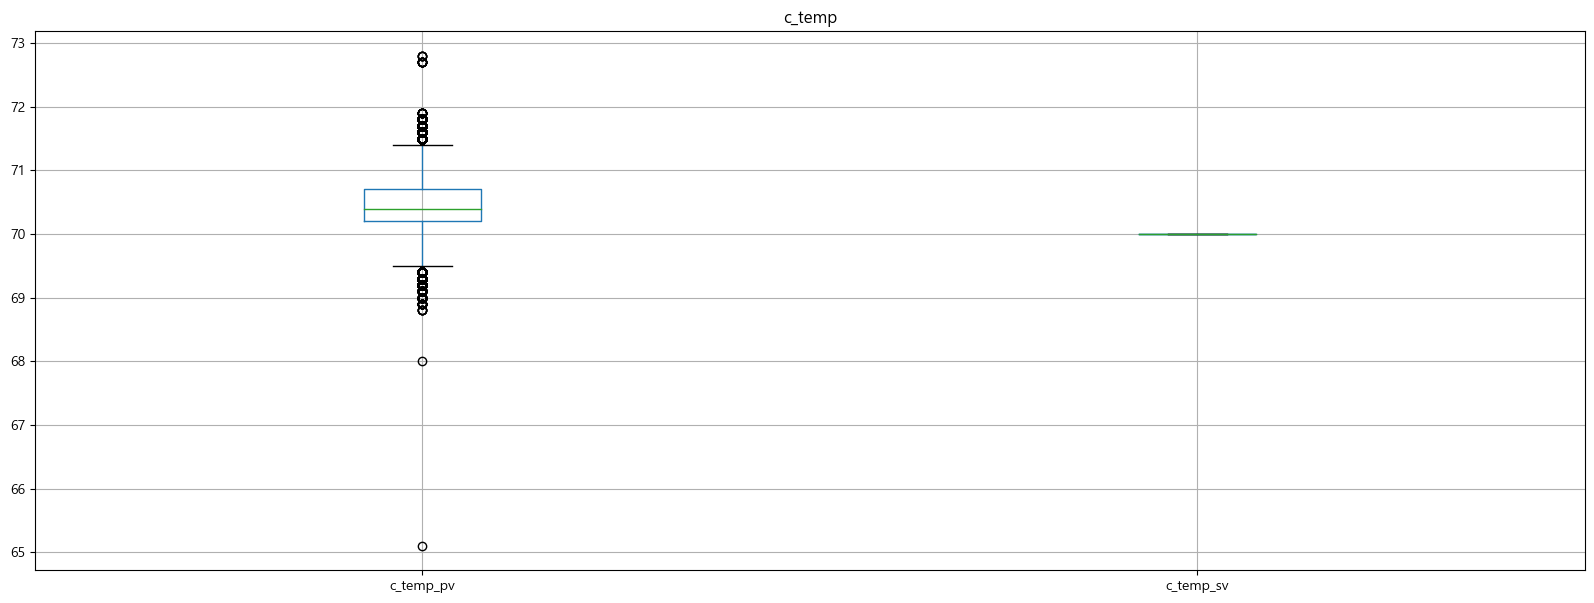

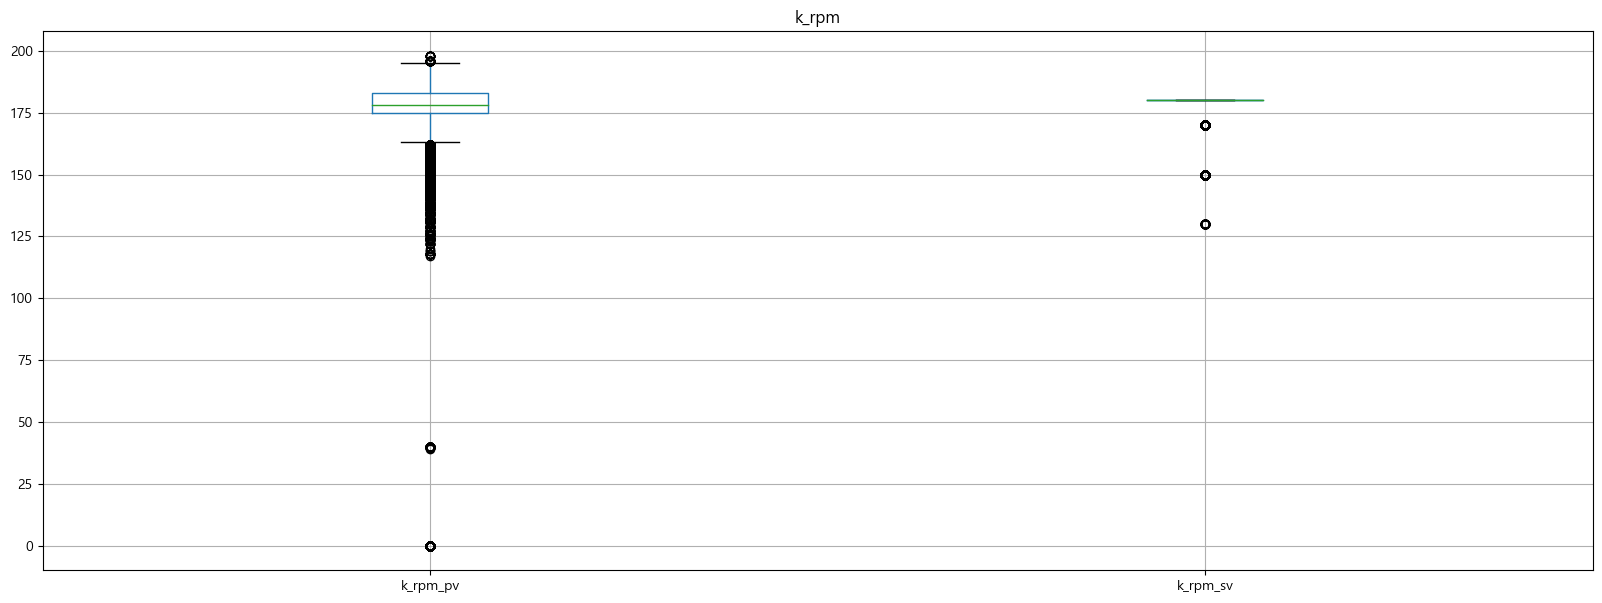

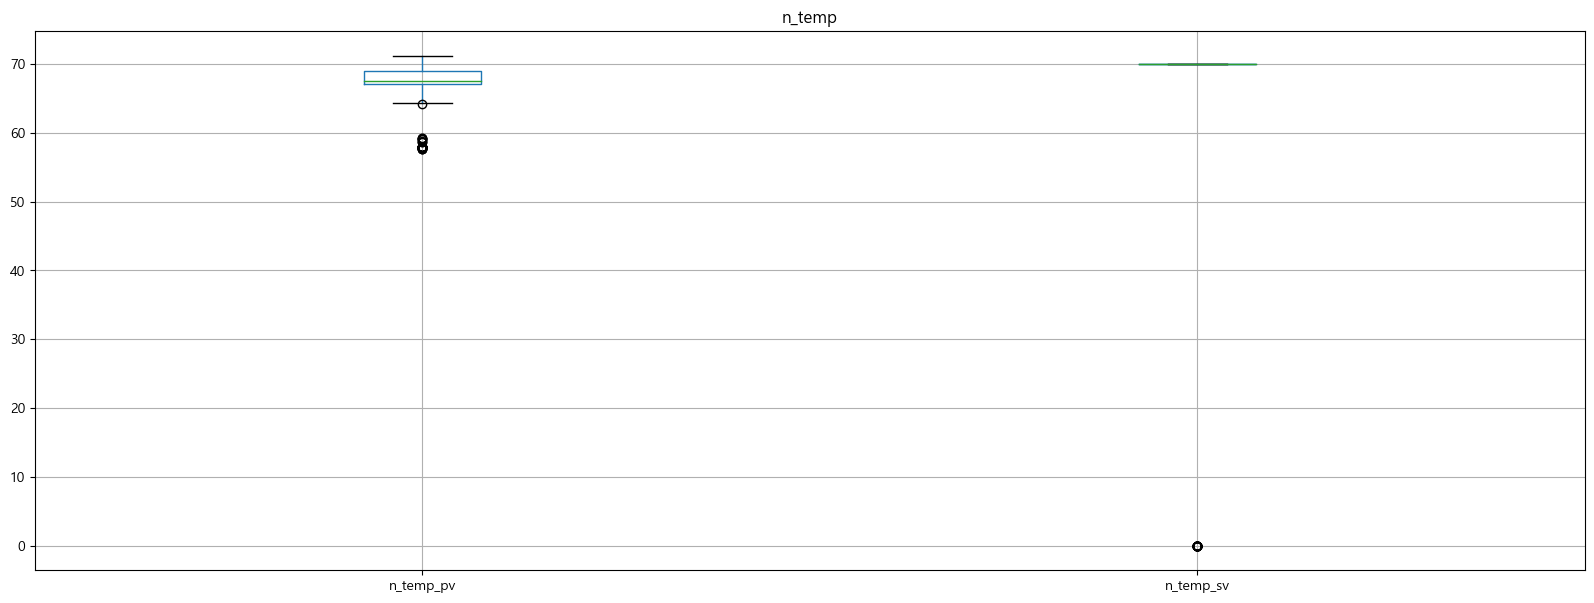

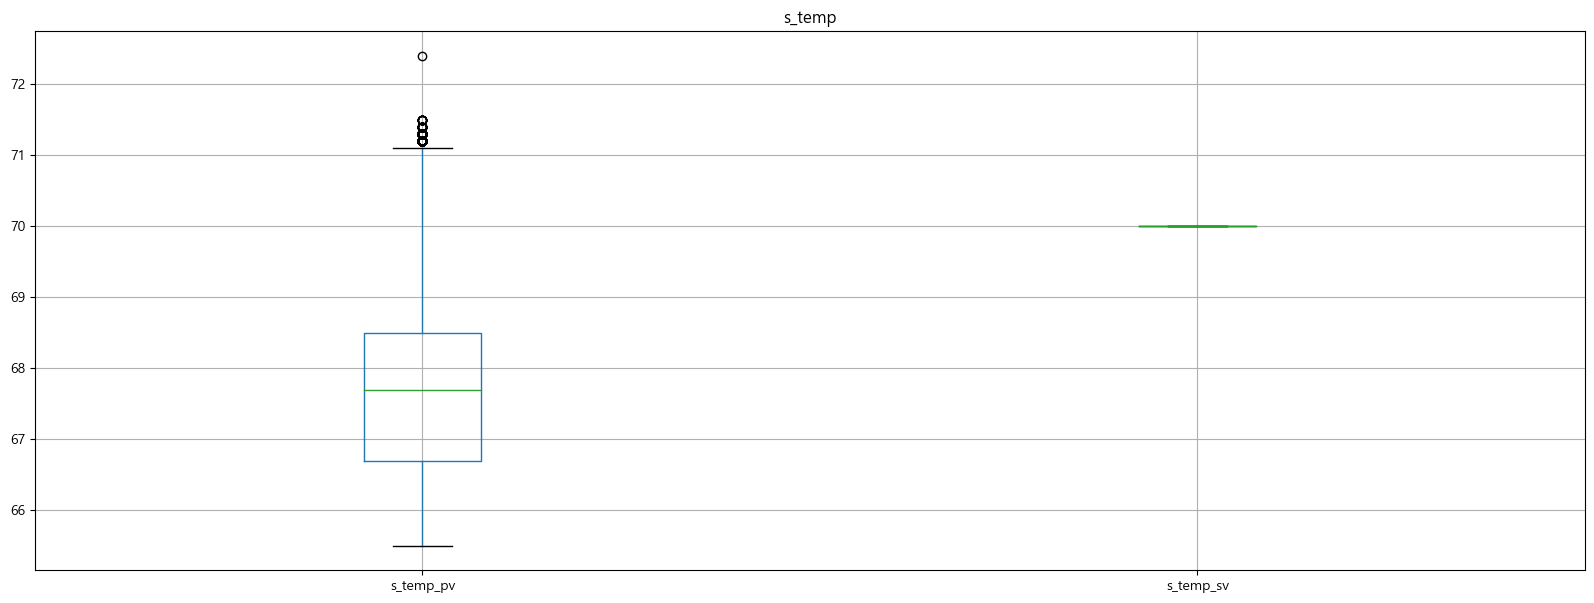

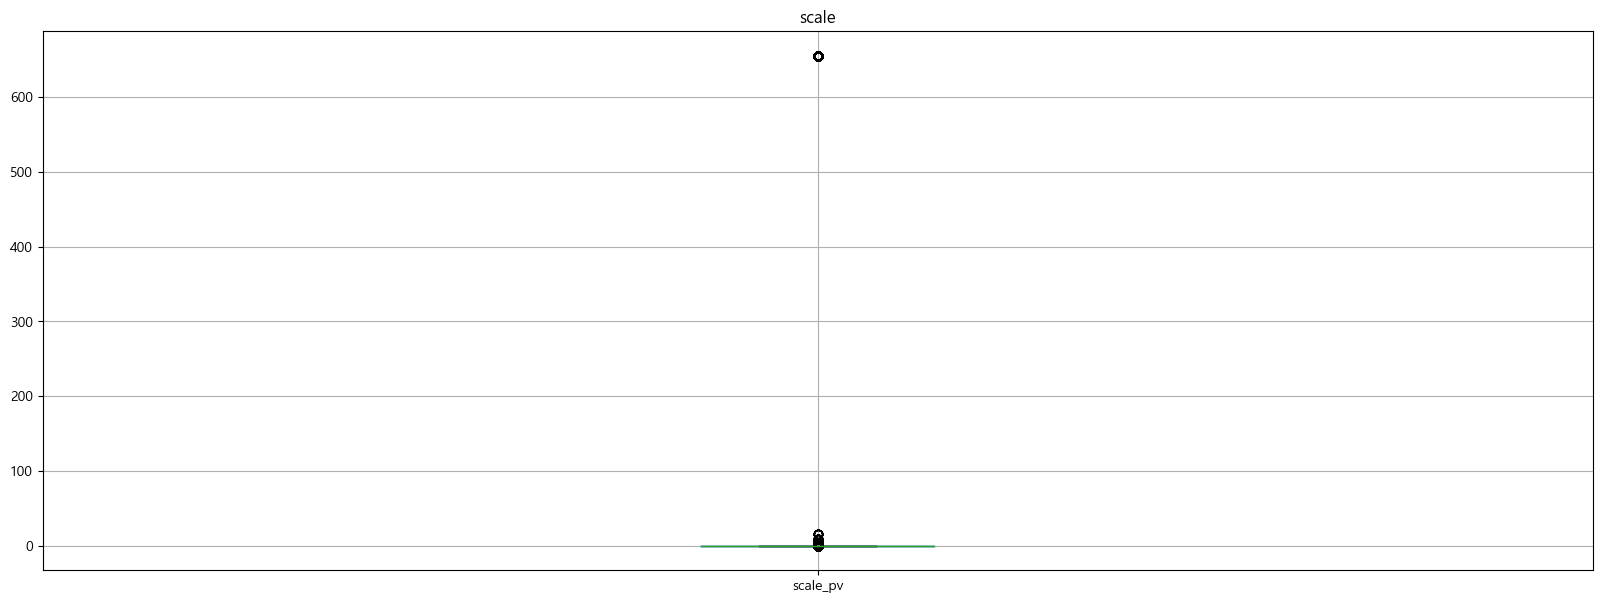

In [8]:
def draw_boxplot(df, *cols):
    if len(cols) == 0:    
        for col_idx in range(1, len(df.columns), 2):
            df[df.columns[col_idx:col_idx+2]].boxplot(figsize=(20, 7))
            plt.title(df.columns[col_idx][:-3])
            plt.show()
    else:
        for col_name in cols:
            df[col_name].boxplot(figsize=(20, 7))
            plt.title(col_name)
            plt.show()

draw_boxplot(df)

### E_scr
-> pv가 sv와 달리 0이 되는 날들이 있음 뭐지!!

In [9]:
df[df["E_scr_pv"] == 0]["time"].dt.date.value_counts()

time
2023-07-11    3068
2023-06-30      48
2023-07-12      47
2023-07-16       1
2023-07-18       1
Name: count, dtype: int64

- 7-11 : rpm도 고무 무게도 엉망 → 하루종일 이 상태라 날리기
- 6-30 ~ 7-18 데이터는 하루 측정의 시작인 부분임 → 마찬가지로 엉망임

In [10]:
(df[df["E_scr_pv"] == 0] != df[df["k_rpm_pv"] == 0]).sum() # 완전 일치

time         0
E_scr_pv     0
E_scr_sv     0
c_temp_pv    0
c_temp_sv    0
k_rpm_pv     0
k_rpm_sv     0
n_temp_pv    0
n_temp_sv    0
s_temp_pv    0
s_temp_sv    0
scale_pv     0
dtype: int64

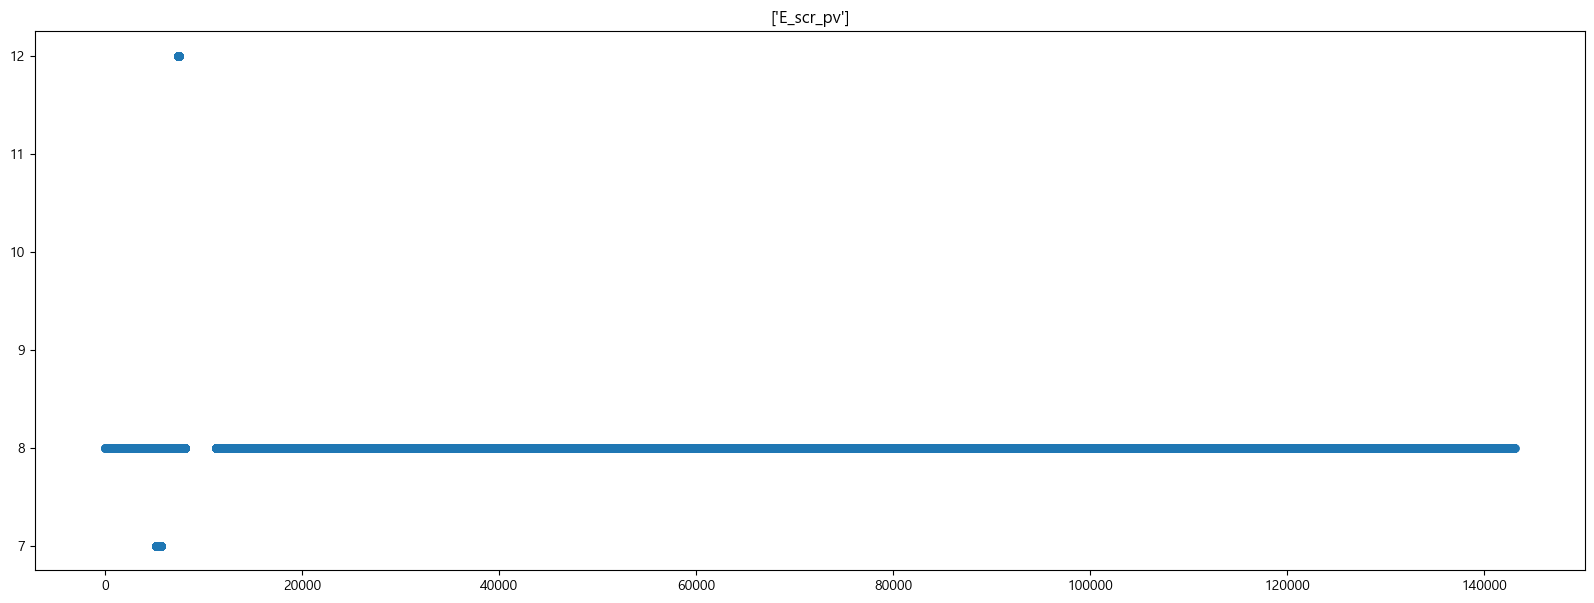

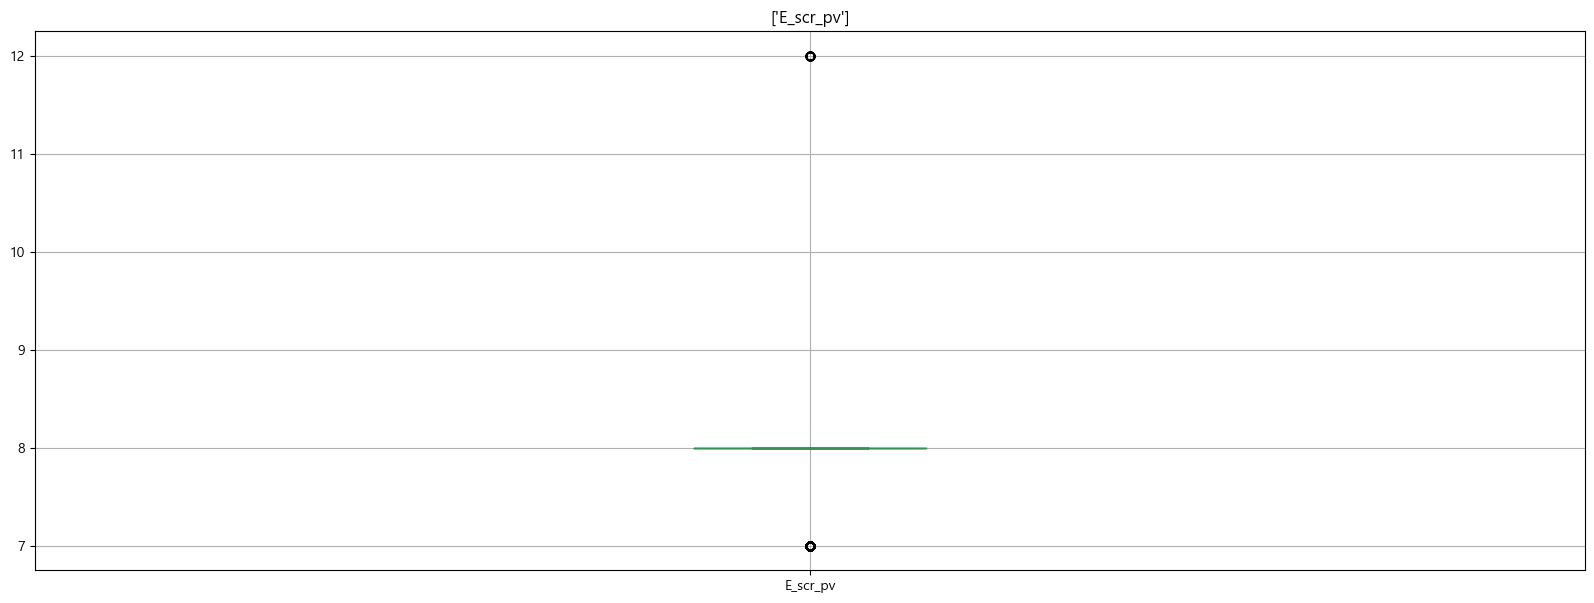

In [11]:
df1 = df[df['E_scr_pv'] != 0]
draw_point(df1, ['E_scr_pv'])
draw_boxplot(df1, ['E_scr_pv'])

### c_temp
-> pv 최저값이 신경쓰임

: 무게가 0이라서 나중에 무시될 듯 

In [12]:
abs(df1["c_temp_pv"].diff()).sort_values(ascending=False)

65011     2.6
65012     2.5
7393      2.2
7407      1.6
110172    1.5
         ... 
82347     0.0
82346     0.0
82345     0.0
22360     0.0
0         NaN
Name: c_temp_pv, Length: 139926, dtype: float64

In [13]:
df1.iloc[61846]

time         2023-08-07 09:55:55.725572+00:00
E_scr_pv                                    8
E_scr_sv                                    8
c_temp_pv                                68.0
c_temp_sv                                  70
k_rpm_pv                                  178
k_rpm_sv                                  180
n_temp_pv                                66.9
n_temp_sv                                  70
s_temp_pv                                66.5
s_temp_sv                                  70
scale_pv                                  0.0
Name: 65011, dtype: object

### n_temp 노즐 온도
- 자료를 보니 0인 부분이 잠시 있음 -> 아저씨가 기계를 내린 것같다... 하지만 온도가 많이 떨어지진 않아서 sv를 70으로 채워도 될 것같음 

In [14]:
df1[df1["n_temp_sv"]==0] # 날짜가 전부 6월 30일 sv-pv의 차이를 이용할 수도 있어서 일단 70으로 채움 

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,s_temp_pv,s_temp_sv,scale_pv
7393,2023-06-30 16:44:29.425310+00:00,12,12,72.8,70,140,130,64.8,0,68.2,70,4.00
7394,2023-06-30 16:44:29.866246+00:00,12,12,72.8,70,140,130,64.8,0,68.3,70,4.00
7395,2023-06-30 16:44:30.295021+00:00,12,12,72.8,70,140,130,64.7,0,68.2,70,4.00
7396,2023-06-30 16:44:30.716846+00:00,12,12,72.7,70,140,130,64.8,0,68.2,70,4.00
7397,2023-06-30 16:44:52.596353+00:00,12,12,72.8,70,140,130,64.3,0,70.0,70,4.03
7398,2023-06-30 16:44:53.018262+00:00,12,12,72.7,70,140,130,64.3,0,70.0,70,4.03
7399,2023-06-30 16:44:53.443566+00:00,12,12,72.7,70,140,130,64.3,0,70.2,70,4.03
7400,2023-06-30 16:44:53.899052+00:00,12,12,72.7,70,140,130,64.3,0,70.1,70,4.03
7401,2023-06-30 16:44:54.320875+00:00,12,12,72.7,70,140,130,64.3,0,70.2,70,4.04
7402,2023-06-30 16:44:54.758331+00:00,12,12,72.7,70,140,130,64.3,0,70.3,70,4.04


In [15]:
df1["n_temp_sv"] = df1["n_temp_sv"].replace(0, 70)
df1[df1["n_temp_sv"]==0] # 아무것도 안나오면 ㅇㅋ

C:\Users\kdp\AppData\Local\Temp\ipykernel_16856\3355756971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["n_temp_sv"] = df1["n_temp_sv"].replace(0, 70)


,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,s_temp_pv,s_temp_sv,scale_pv


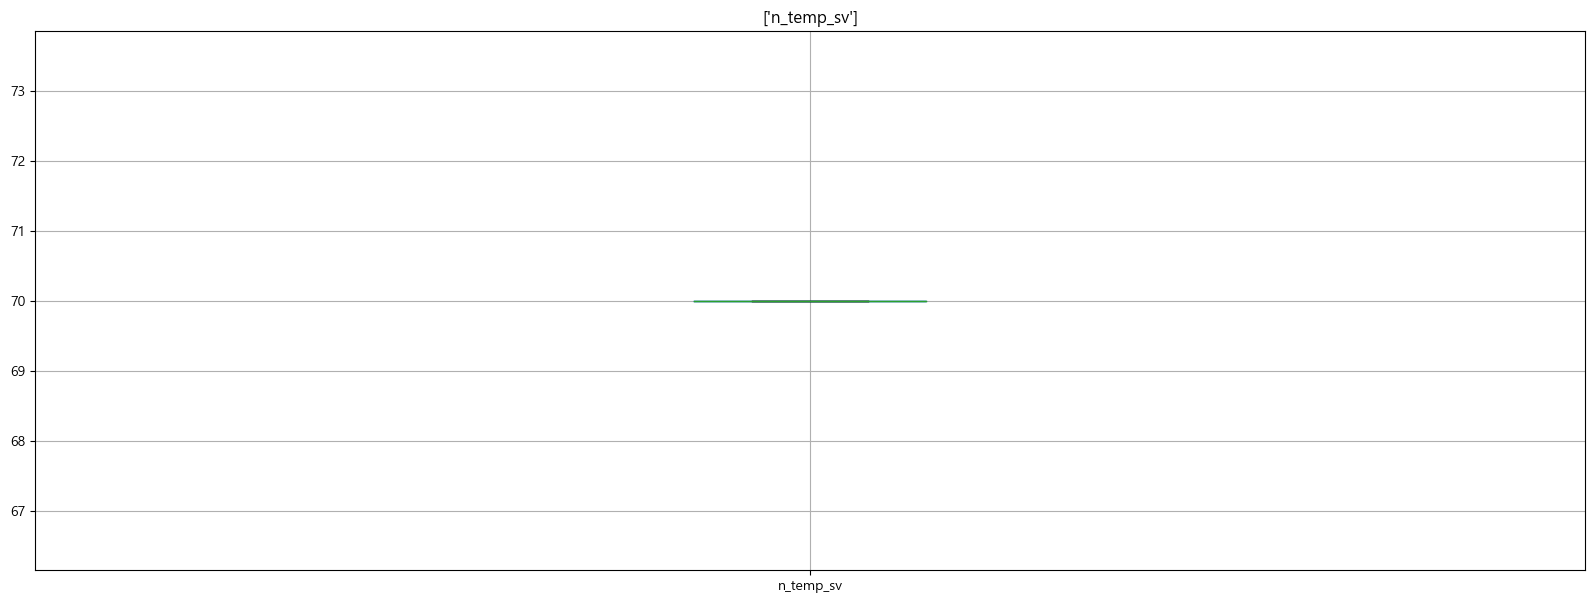

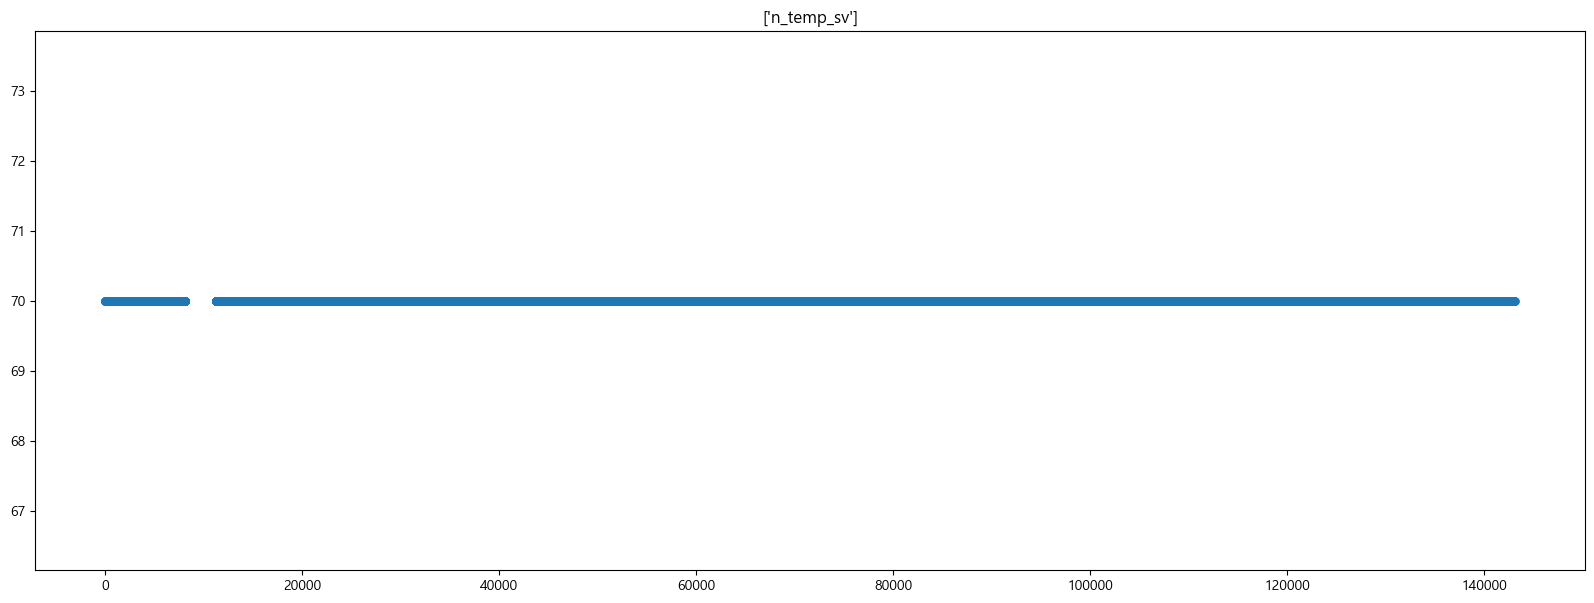

In [16]:
draw_boxplot(df1, ["n_temp_sv"])
draw_point(df1, ["n_temp_sv"])

In [17]:
df2 = df1.reset_index(drop=True).copy()

### k_rpm_pv

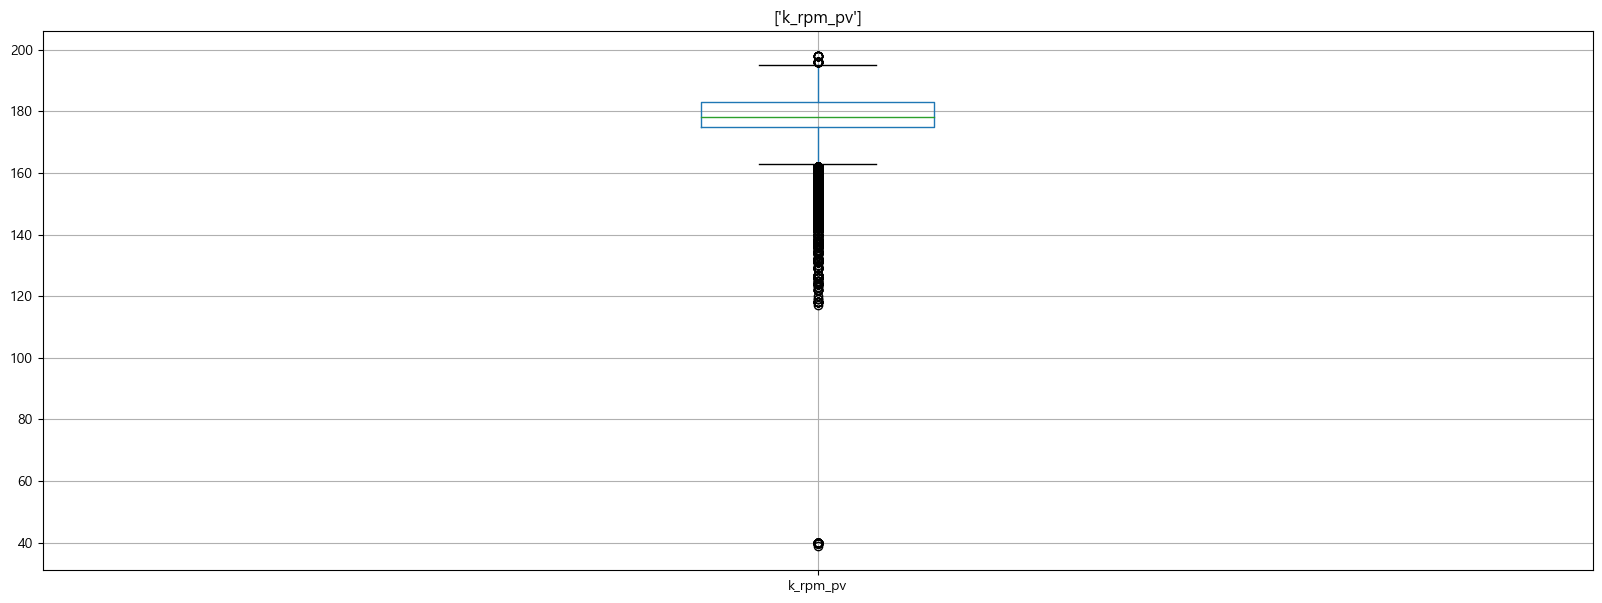

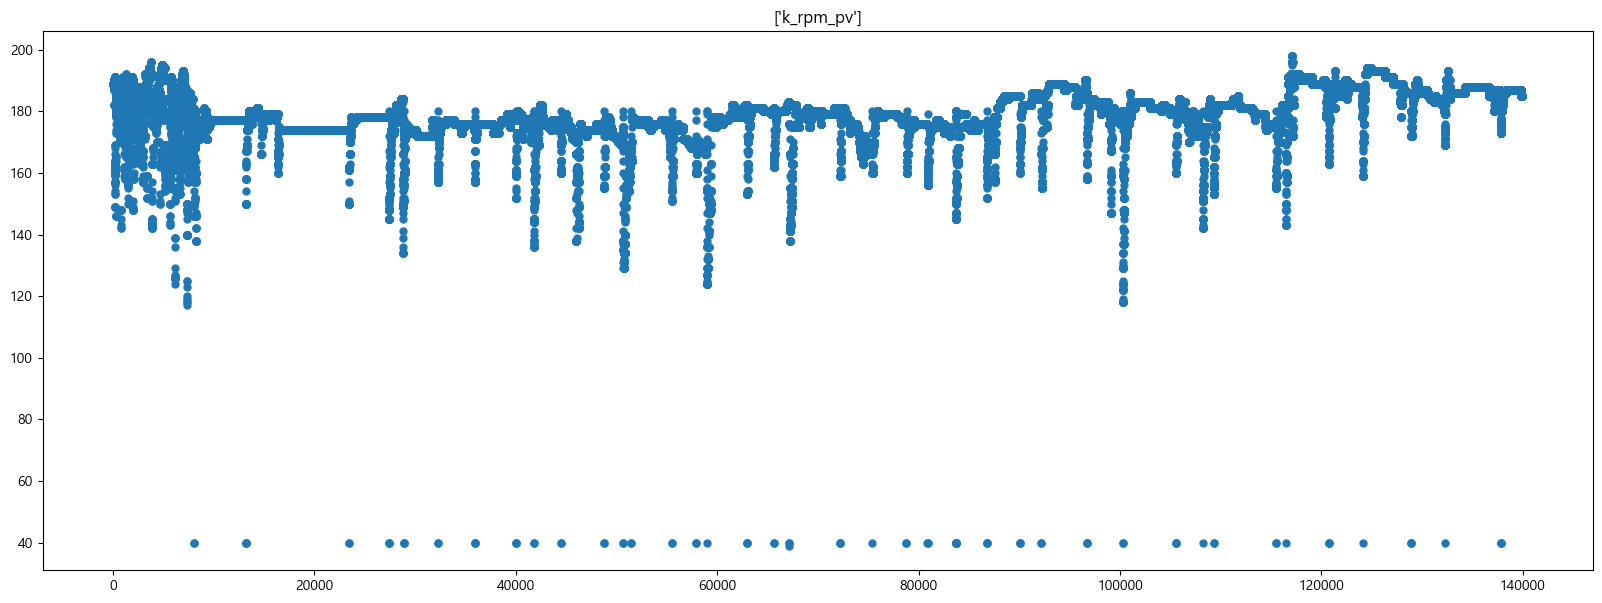

In [18]:
draw_boxplot(df2, ["k_rpm_pv"])
draw_point(df2, ["k_rpm_pv"])

In [19]:
df2[df2["k_rpm_pv"] < 60] 

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,s_temp_pv,s_temp_sv,scale_pv
8024,2023-07-12 00:01:35.003616+00:00,8,8,70.4,70,40,150,69.3,70,70.0,70,0.0
8025,2023-07-12 00:01:37.043306+00:00,8,8,70.3,70,40,150,69.4,70,69.6,70,0.0
13213,2023-07-12 02:16:12.662296+00:00,8,8,69.9,70,40,150,70.4,70,69.3,70,0.0
13214,2023-07-12 02:16:13.709068+00:00,8,8,69.9,70,40,150,70.4,70,69.2,70,0.0
13215,2023-07-12 02:16:14.755822+00:00,8,8,69.9,70,40,150,70.4,70,69.4,70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128892,2023-09-07 09:13:18.356498+00:00,8,8,70.3,70,40,180,70.5,70,69.9,70,0.0
132227,2023-09-08 04:42:02.137135+00:00,8,8,70.0,70,40,180,69.3,70,71.0,70,0.0
137792,2023-09-08 06:53:54.391888+00:00,8,8,70.3,70,40,180,70.8,70,69.1,70,0.0
137793,2023-09-08 06:53:55.756368+00:00,8,8,70.2,70,40,180,70.8,70,69.3,70,0.0


In [20]:
df2[(df2["k_rpm_pv"] < 60) & (df2["scale_pv"] != 0)]

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,s_temp_pv,s_temp_sv,scale_pv
83664,2023-08-16 00:26:26.556486+00:00,8,8,70.2,70,40,180,68.0,70,67.0,70,3.02
83665,2023-08-16 00:26:27.576137+00:00,8,8,70.2,70,40,180,68.0,70,67.0,70,3.02
83666,2023-08-16 00:26:28.628156+00:00,8,8,70.2,70,40,180,67.9,70,66.8,70,3.02


In [21]:
df2["k_rpm_pv"].iloc[83664] = 176
df2["k_rpm_pv"].iloc[83665] = 177
df2["k_rpm_pv"].iloc[83666] = 178

C:\Users\kdp\AppData\Local\Temp\ipykernel_16856\463793387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["k_rpm_pv"].iloc[83664] = 176
C:\Users\kdp\AppData\Local\Temp\ipykernel_16856\463793387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["k_rpm_pv"].iloc[83665] = 177
C:\Users\kdp\AppData\Local\Temp\ipykernel_16856\463793387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["k_rpm_pv"].iloc[83666] = 178


In [22]:
df2[(df2["k_rpm_pv"] < 60) & (df2["scale_pv"] != 0)]
# 아무것도 안뜨면 OK

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,s_temp_pv,s_temp_sv,scale_pv


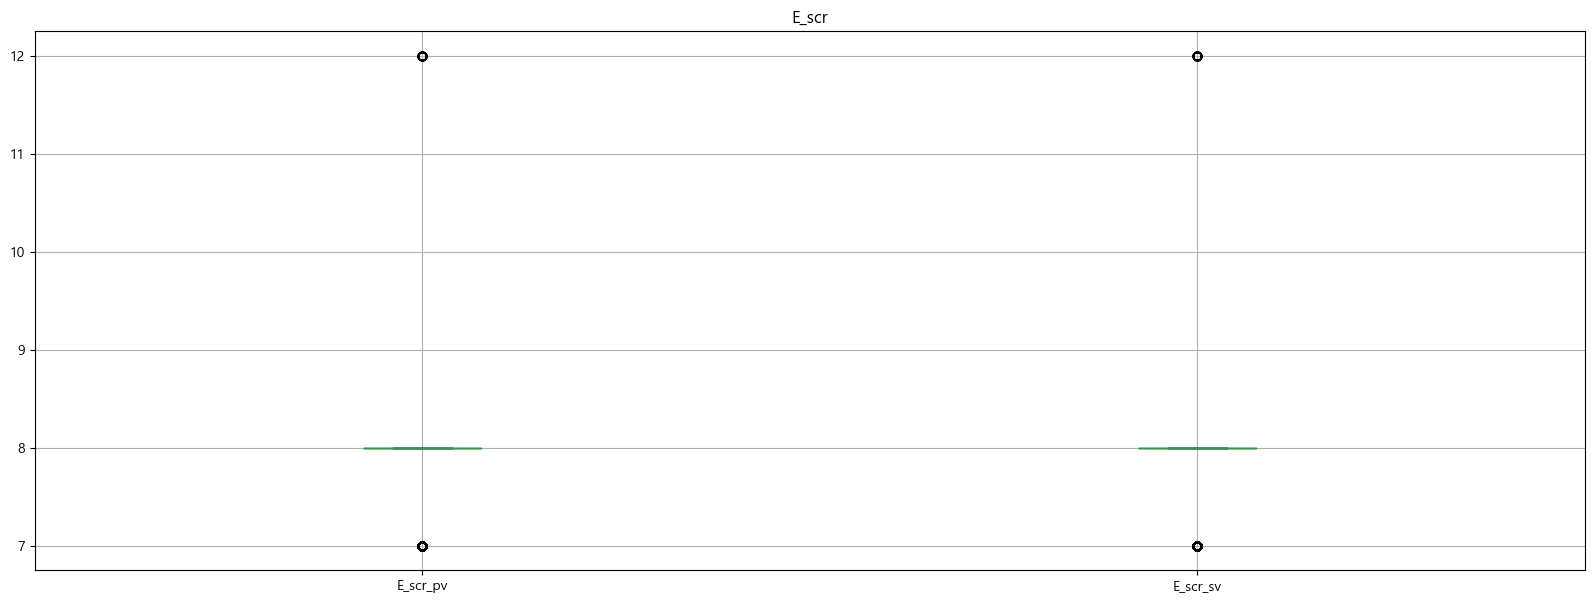

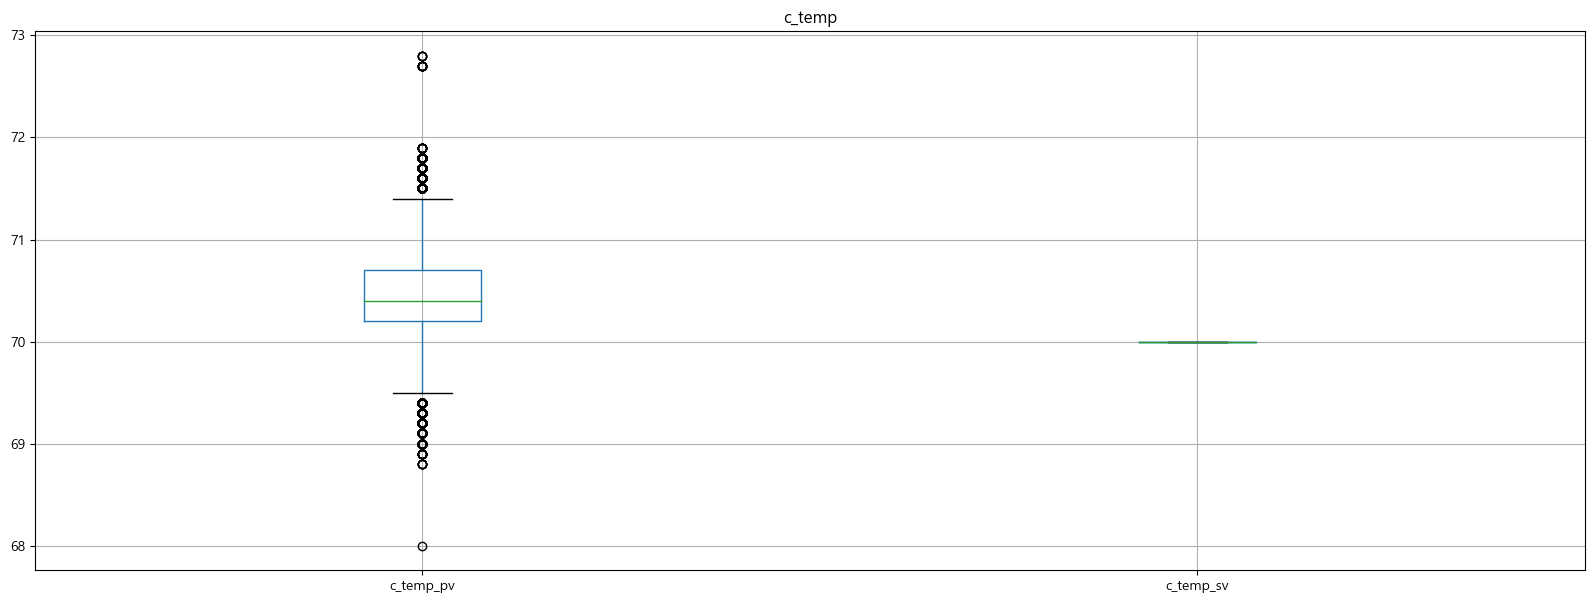

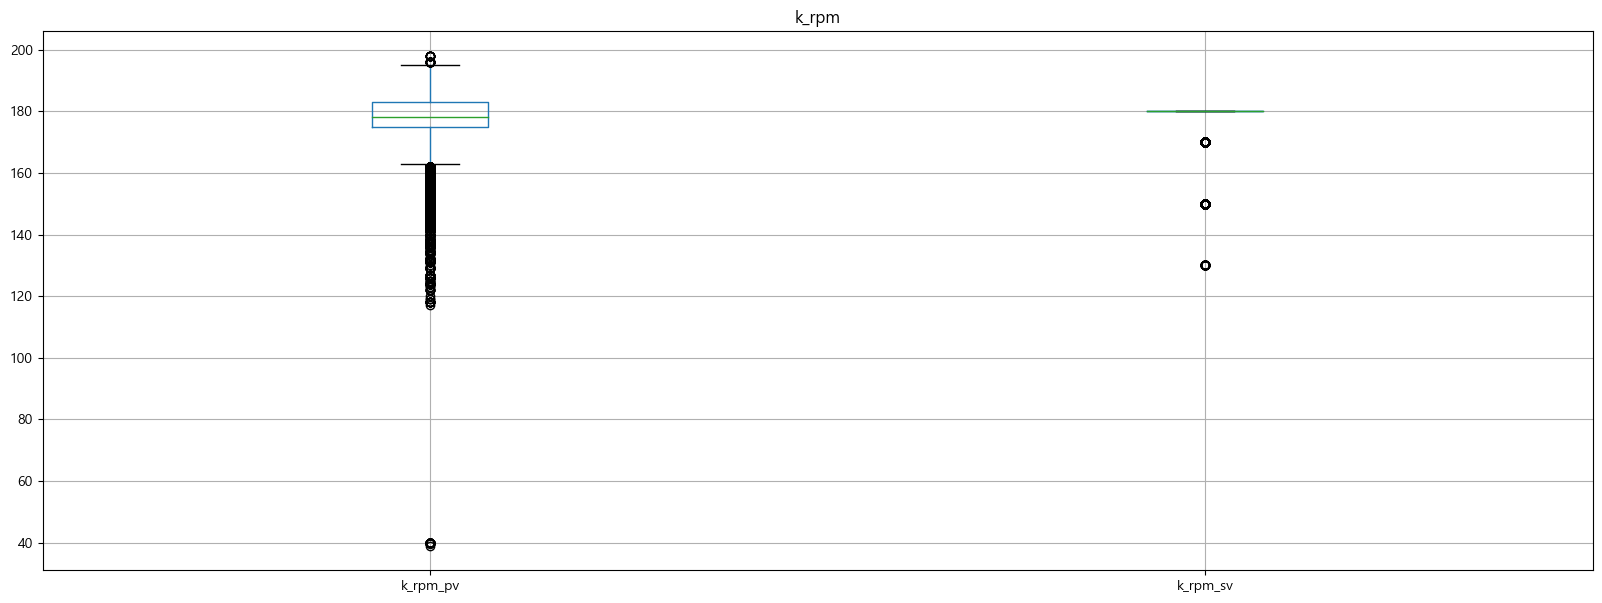

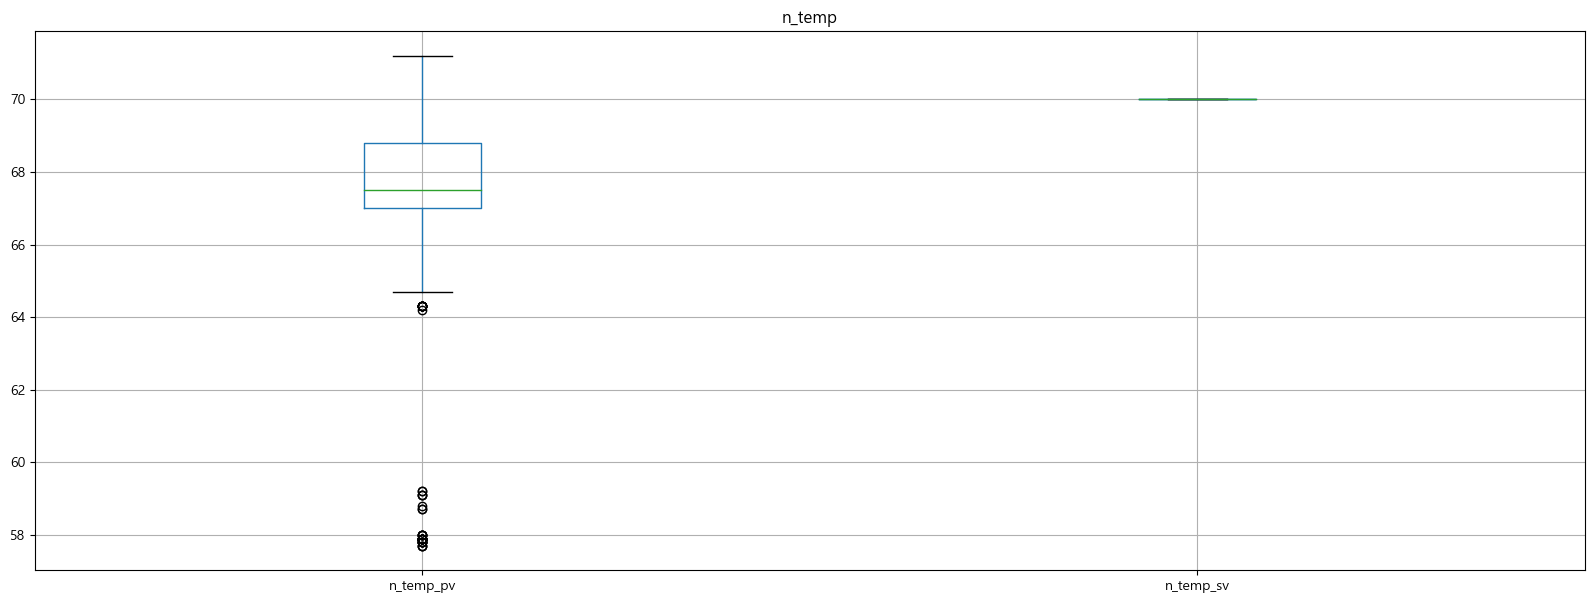

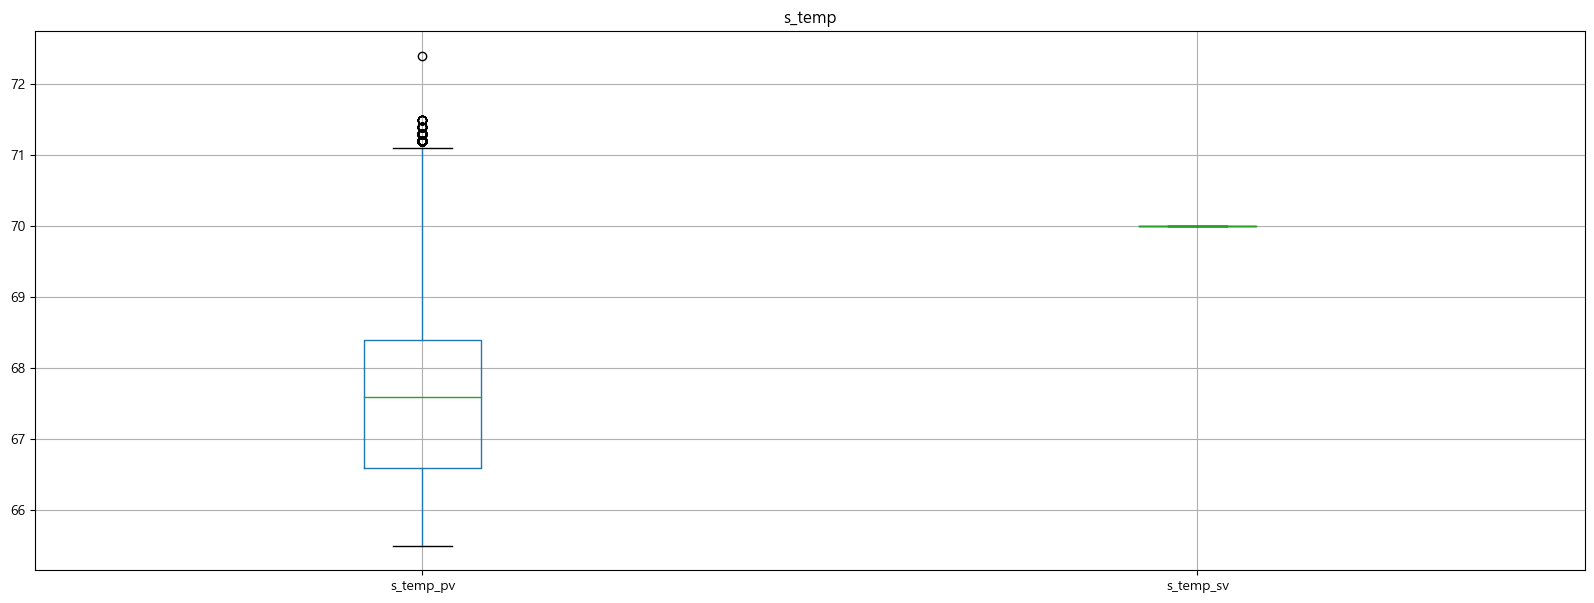

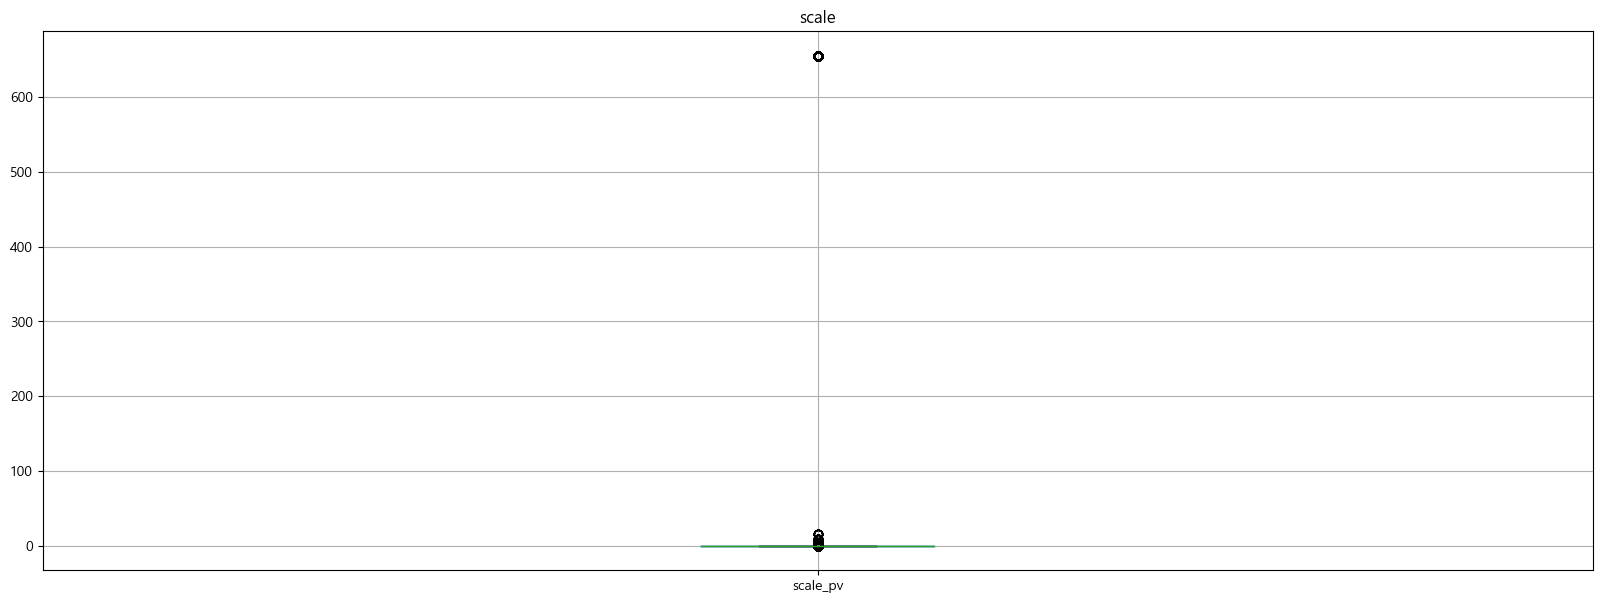

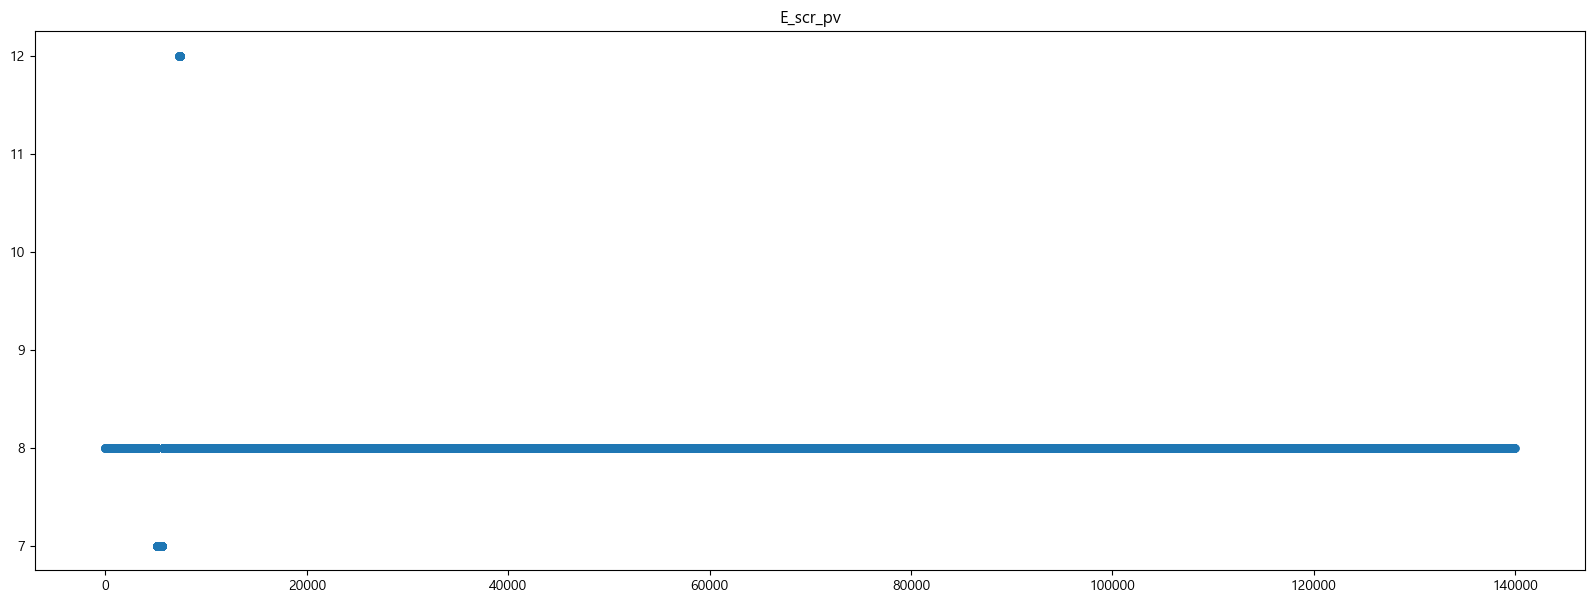

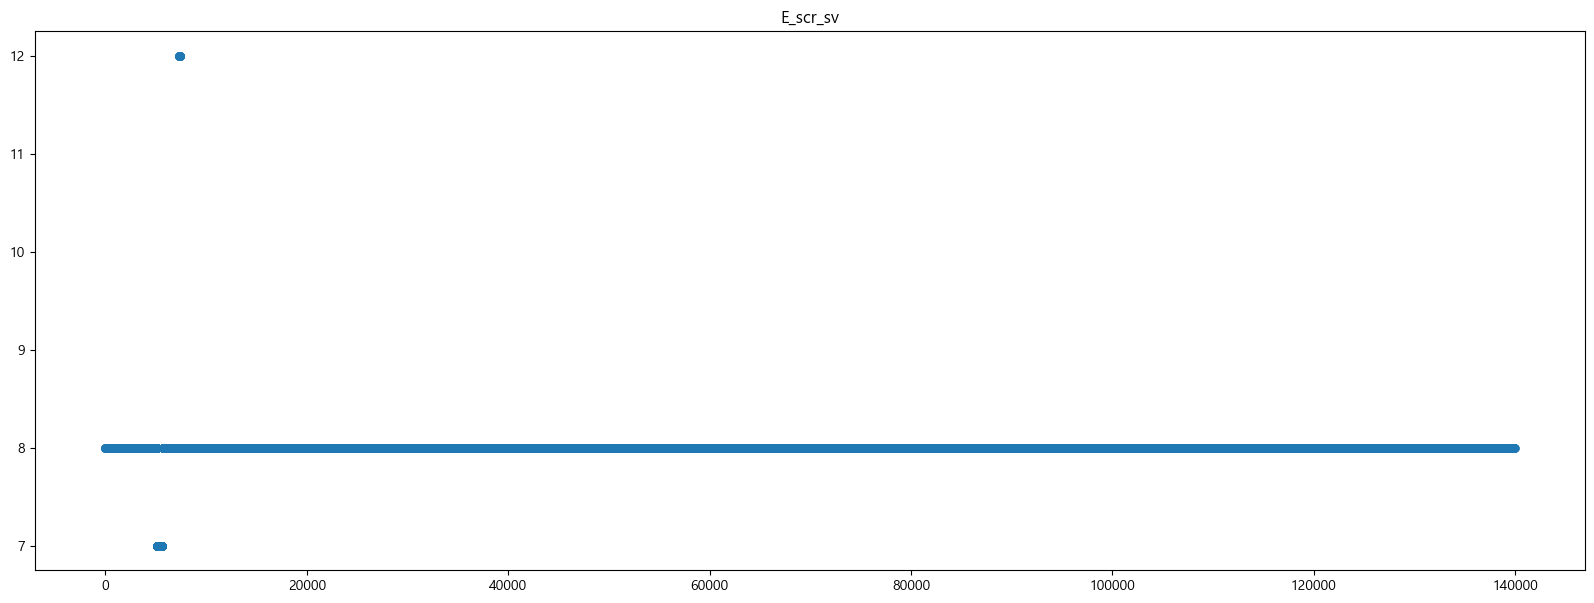

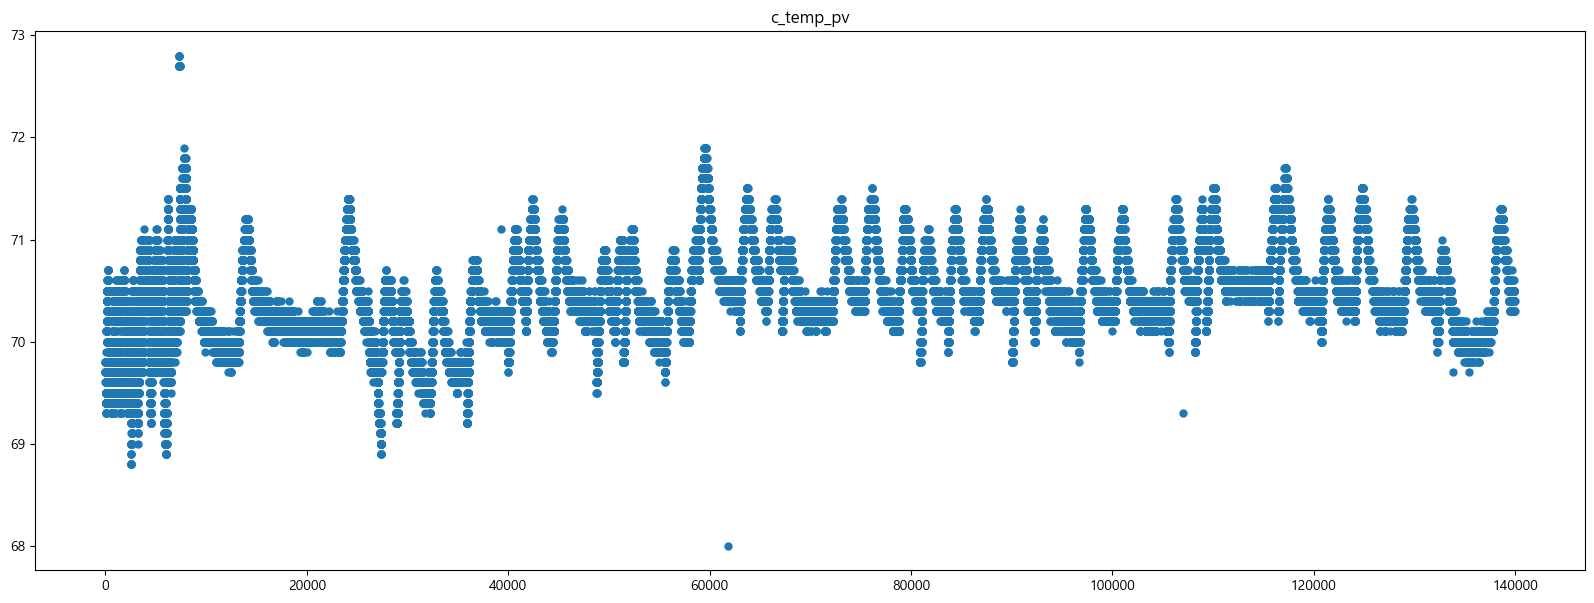

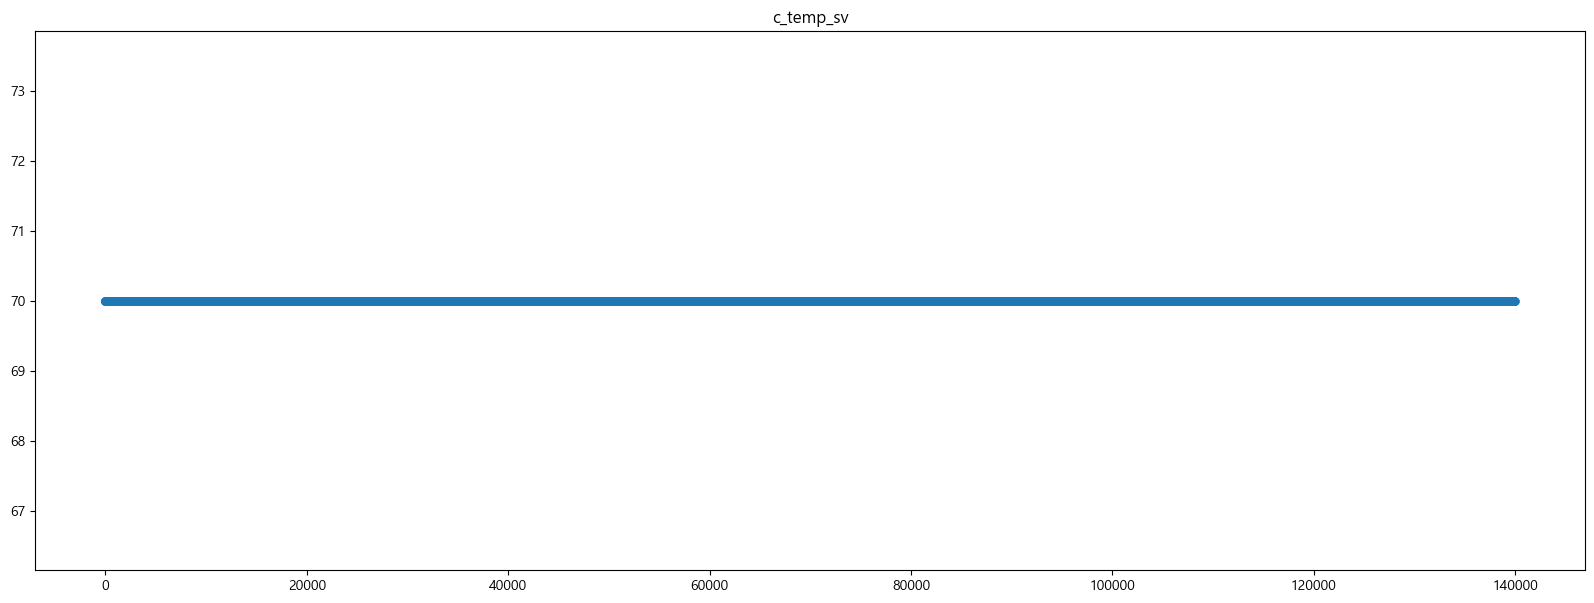

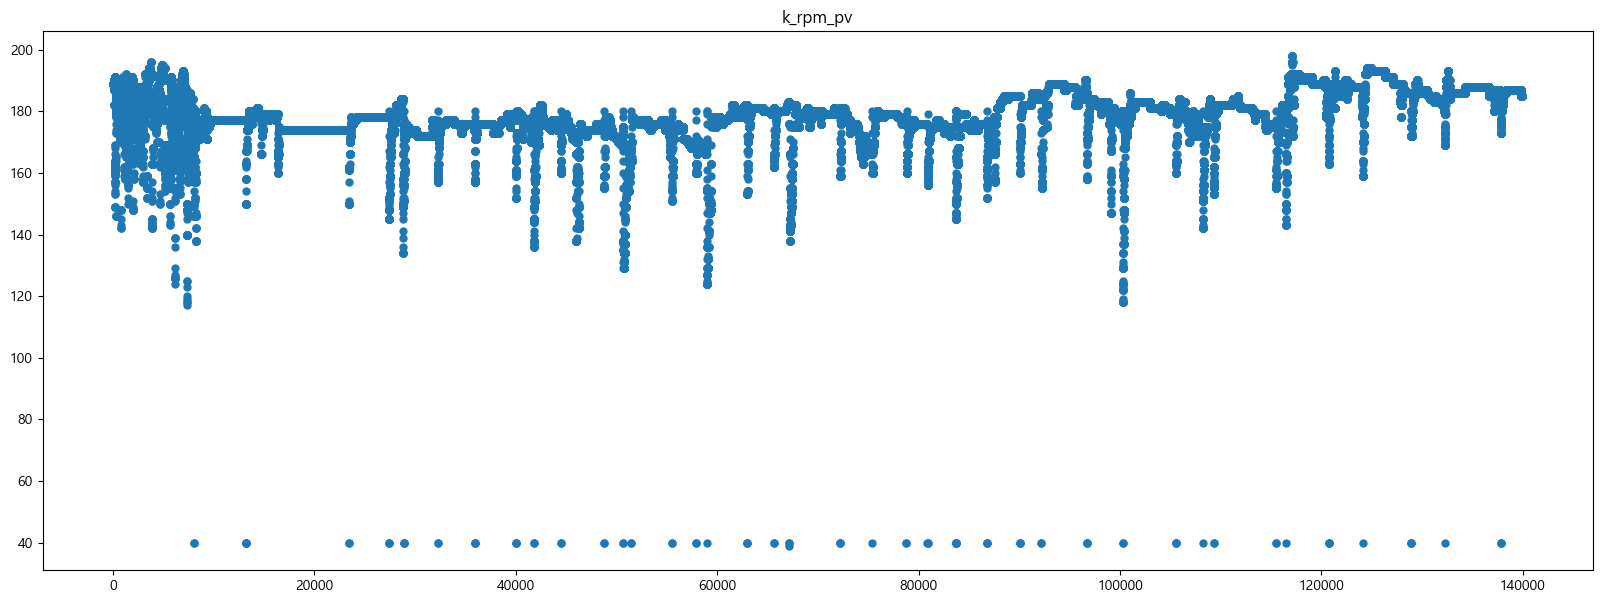

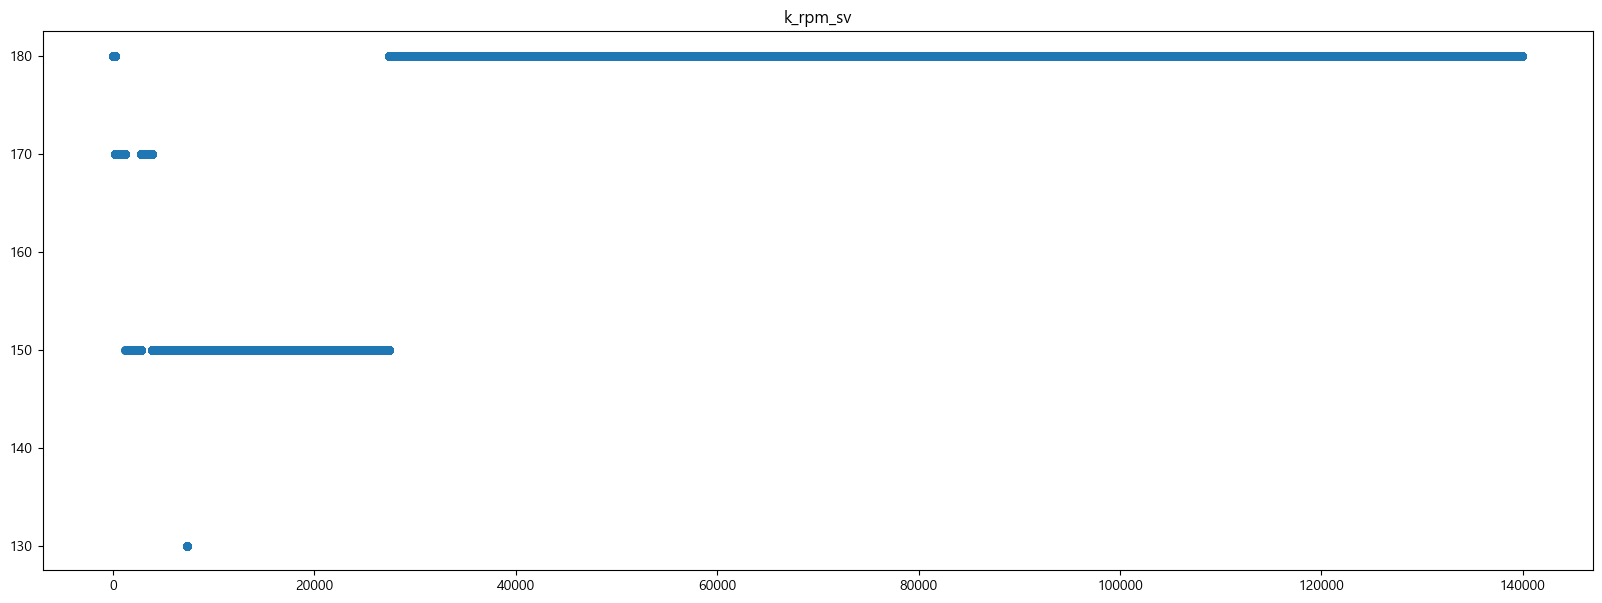

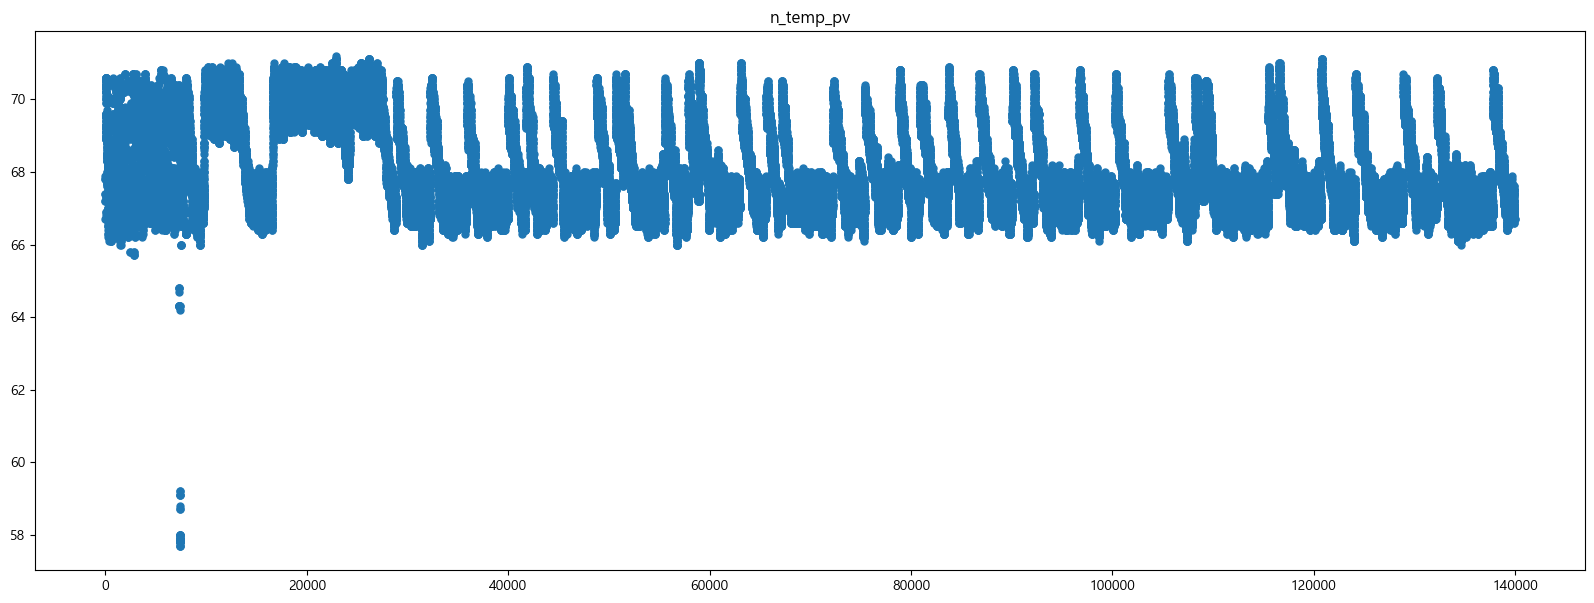

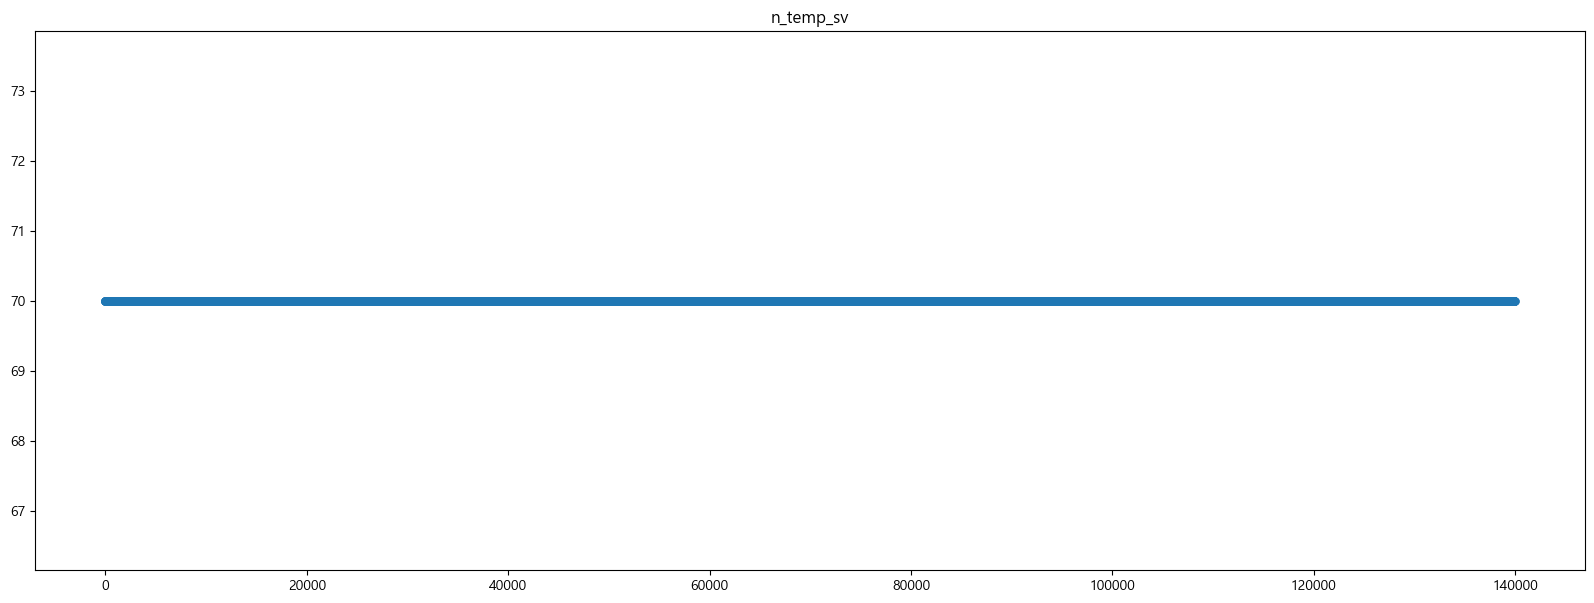

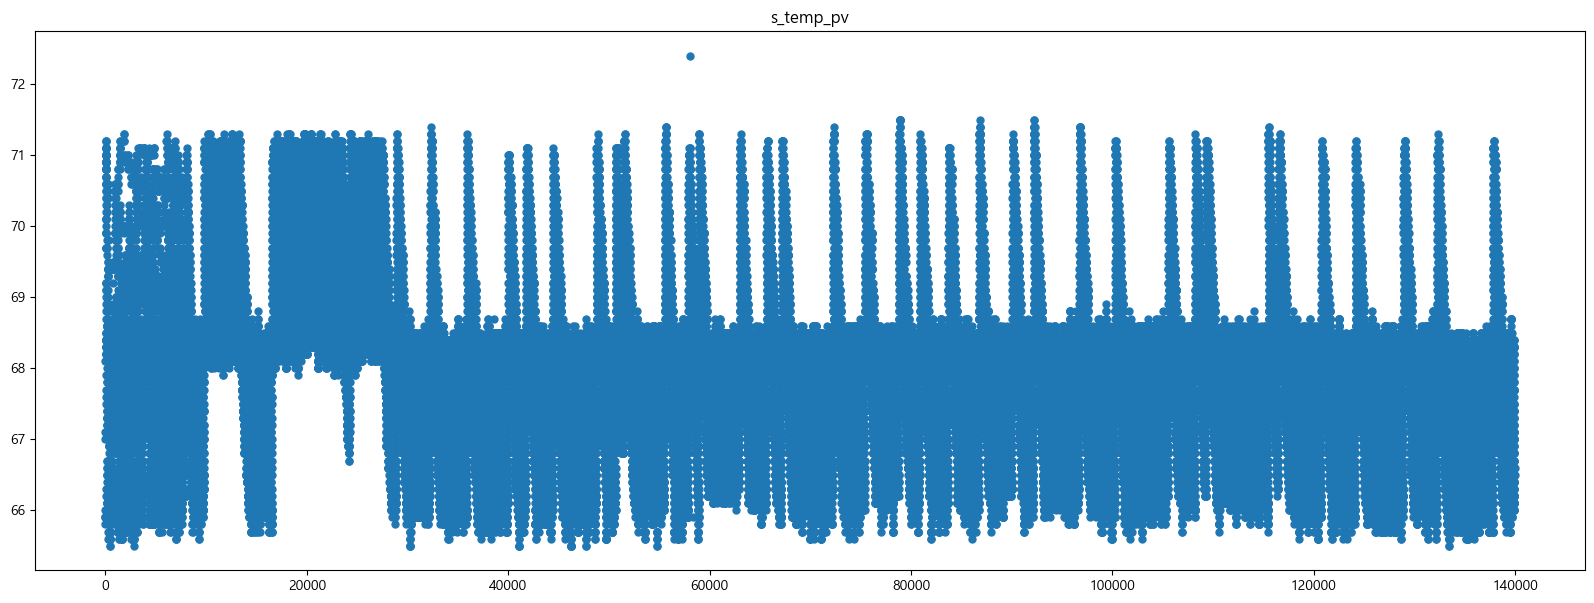

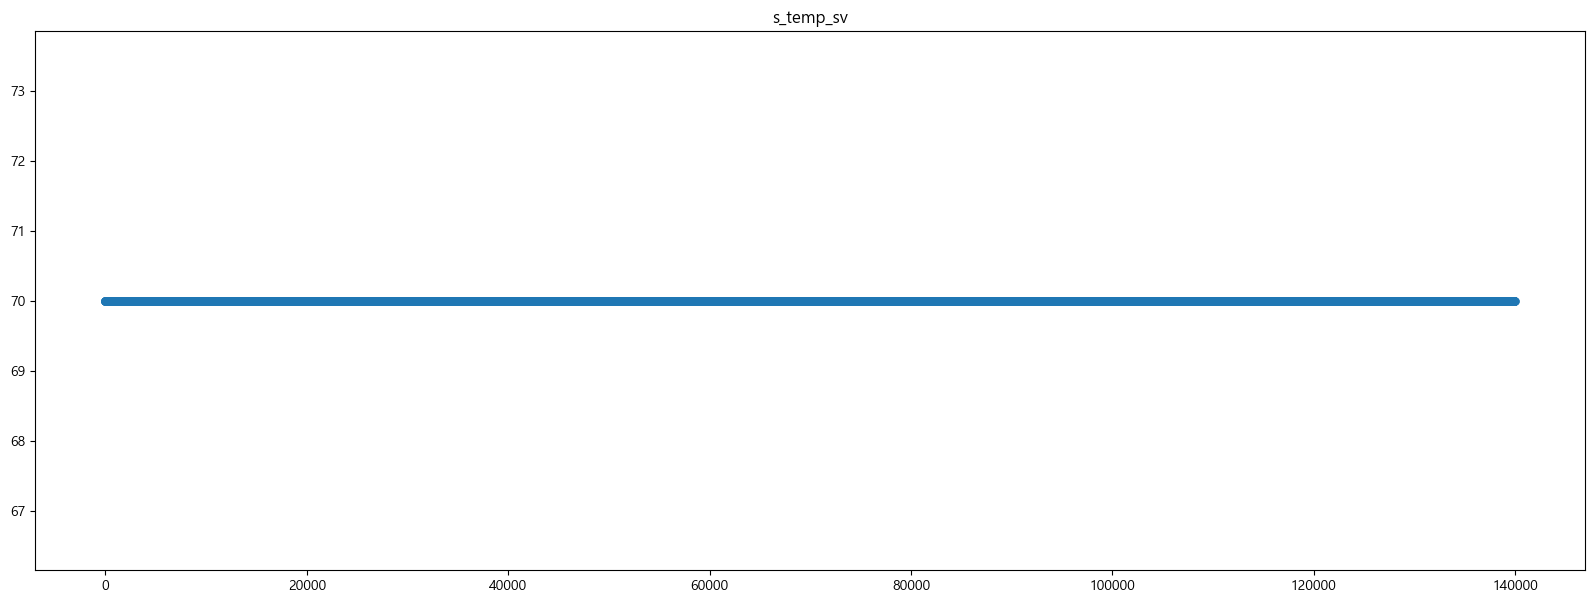

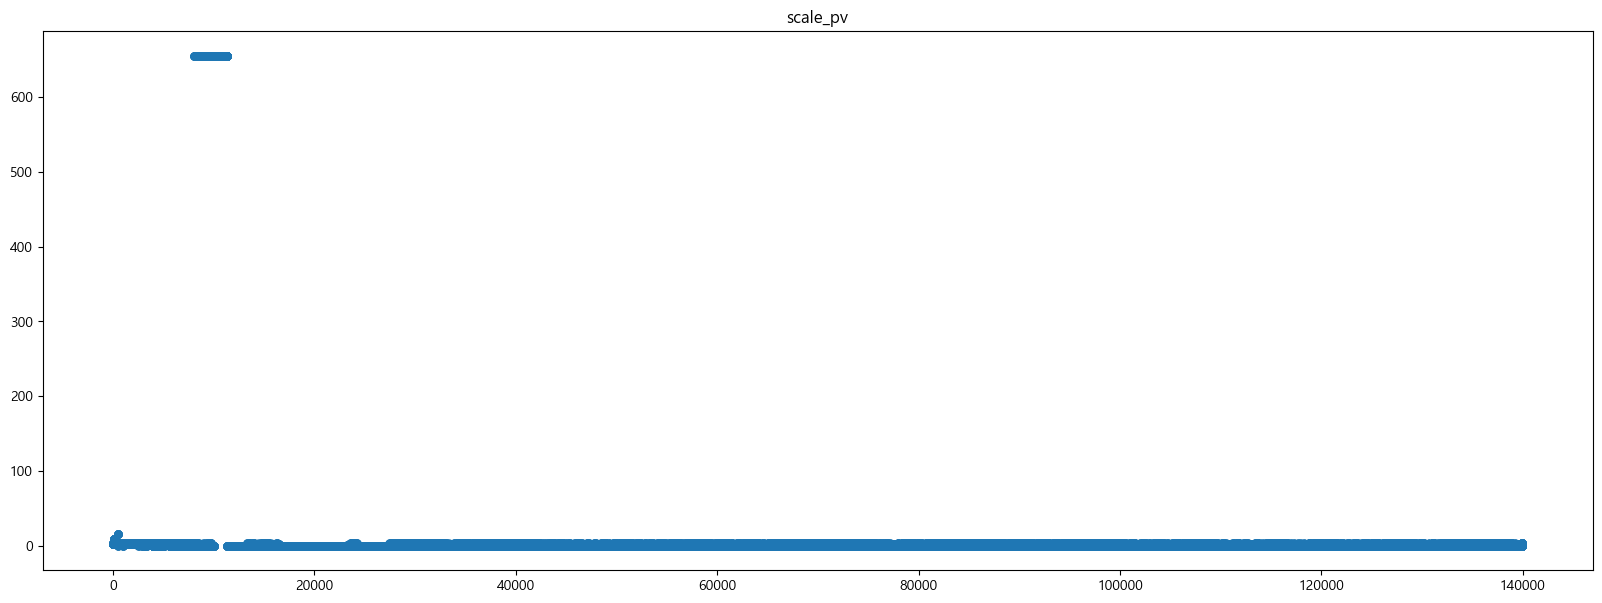

In [23]:
draw_boxplot(df2)
draw_point(df2)

### scale_pv
-> 600 언저리인 값 제거 

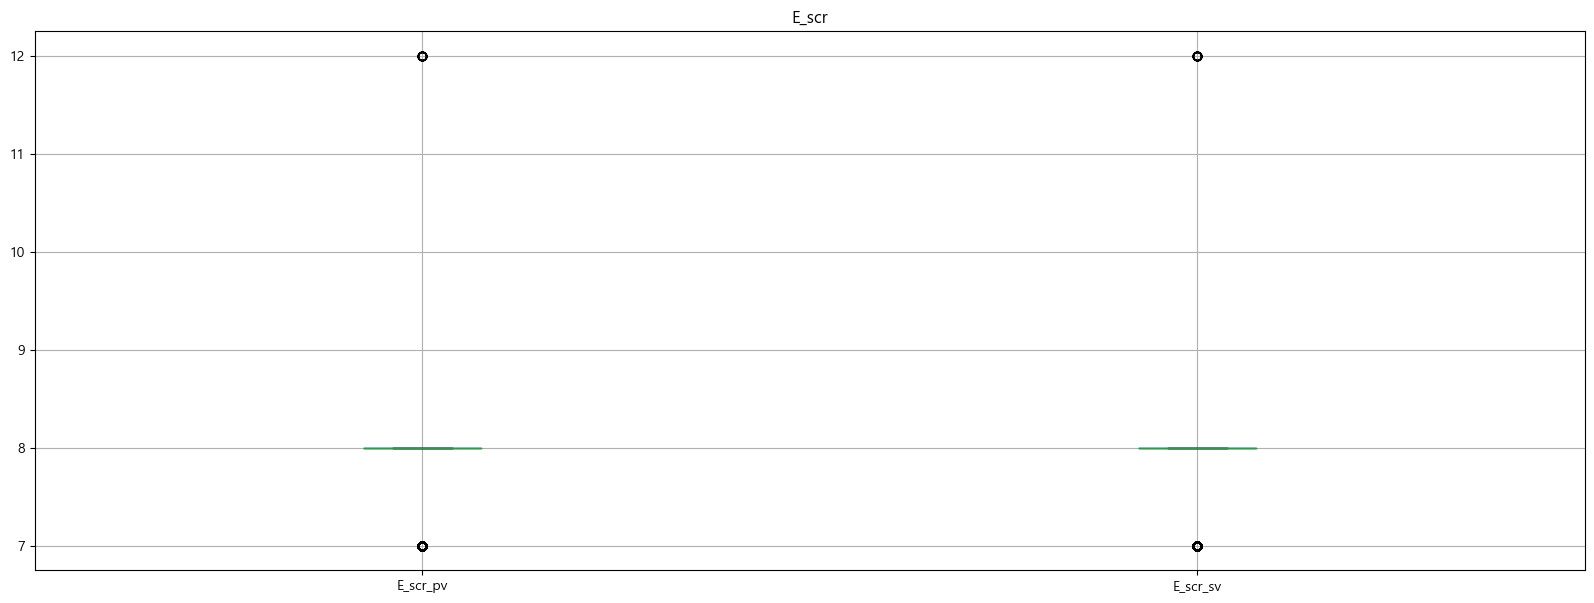

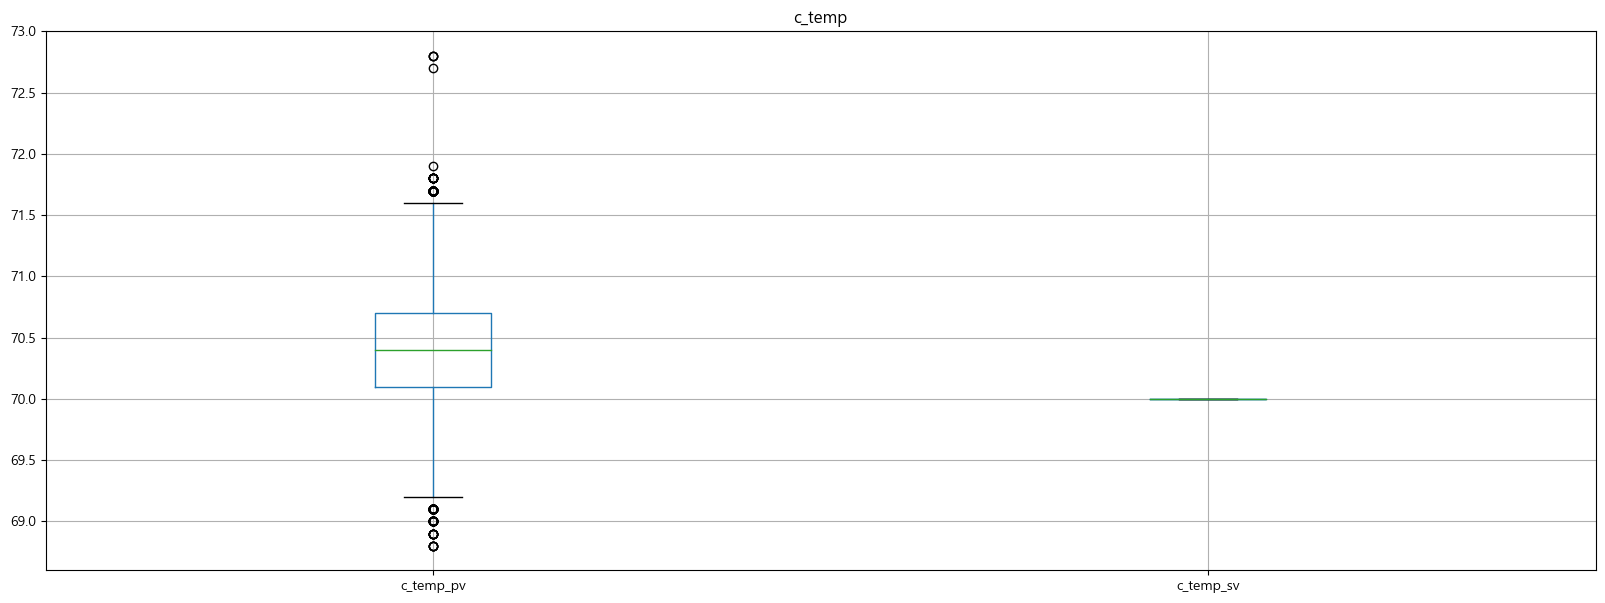

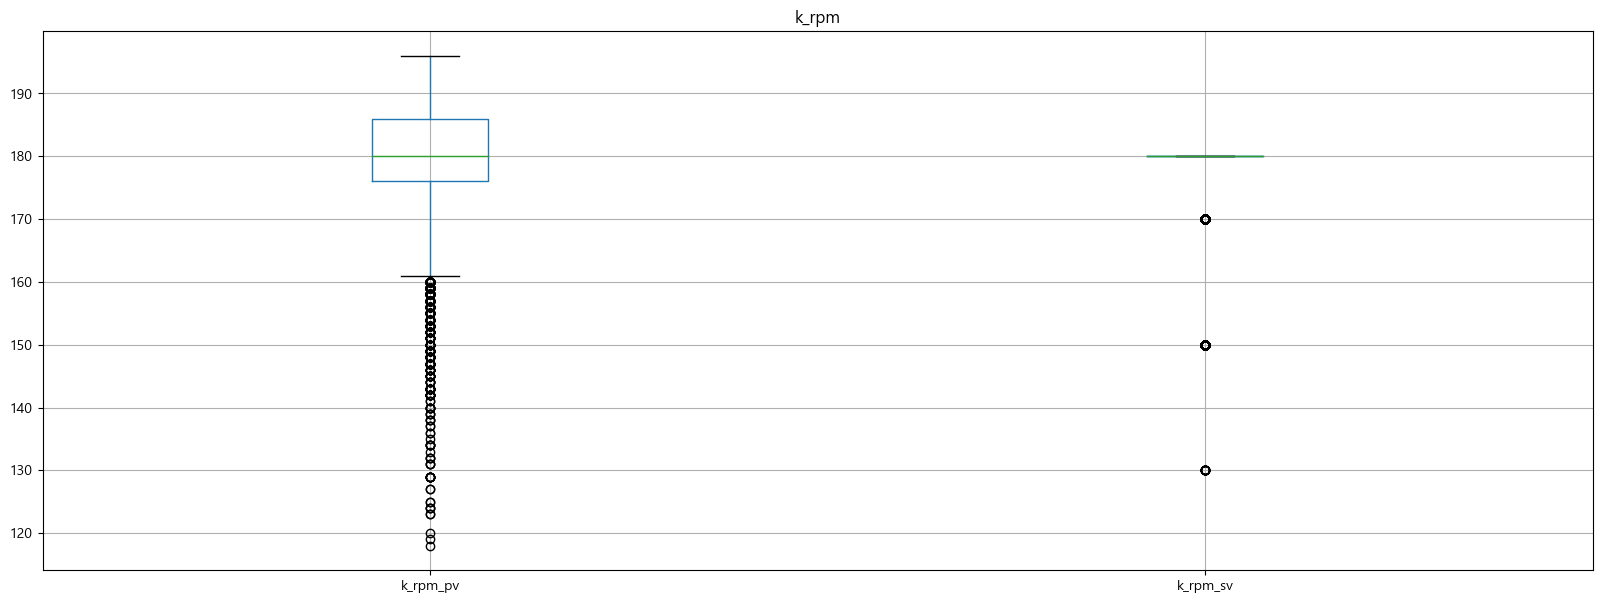

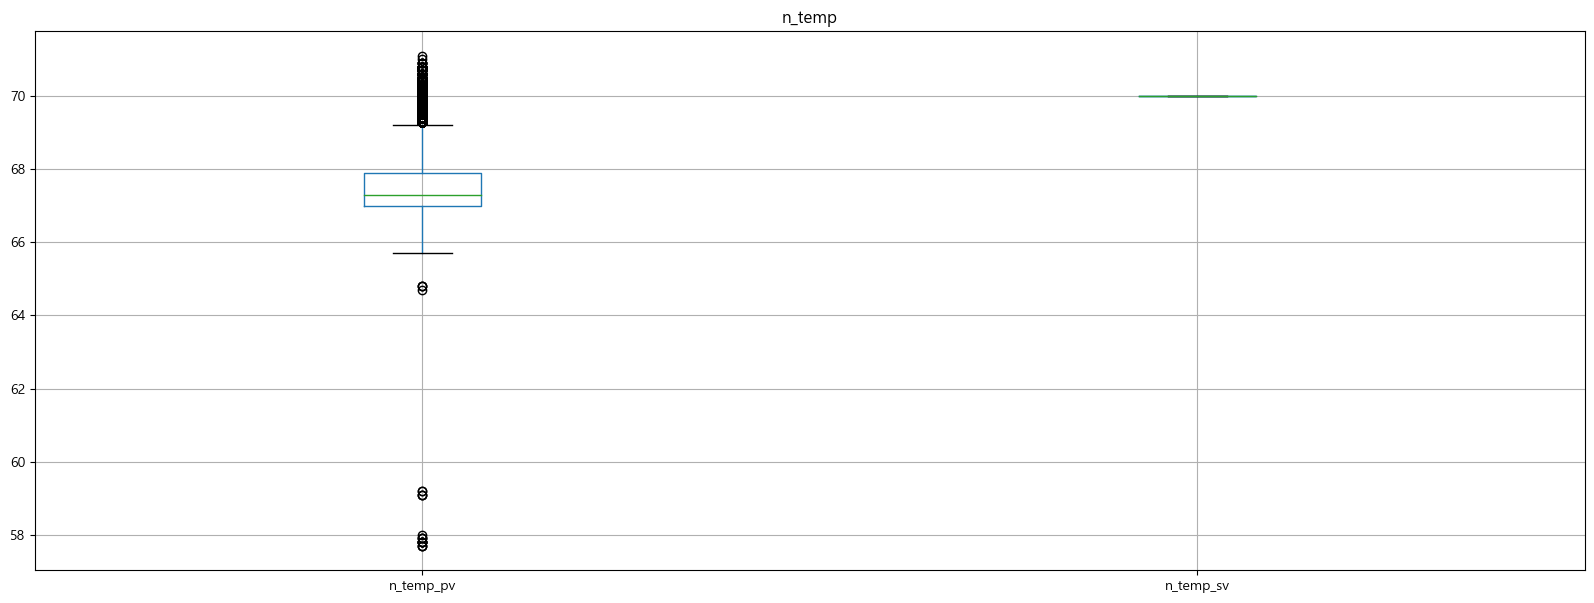

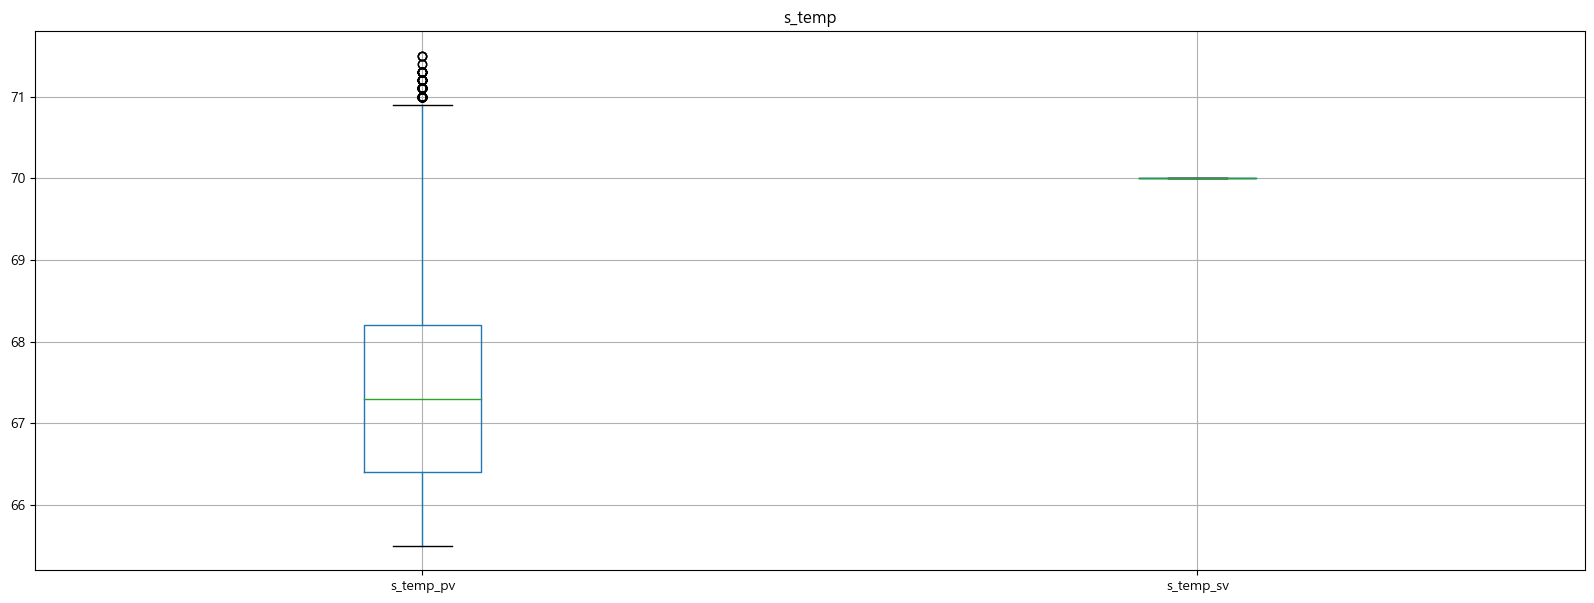

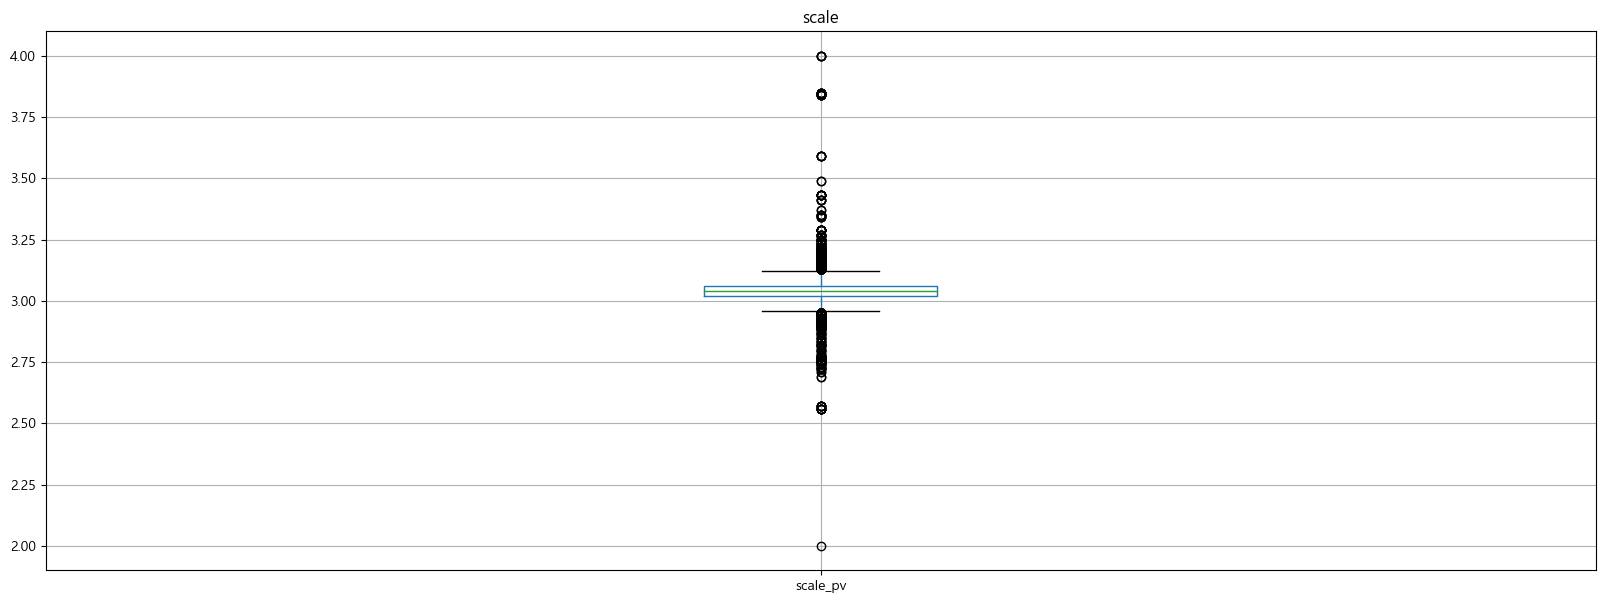

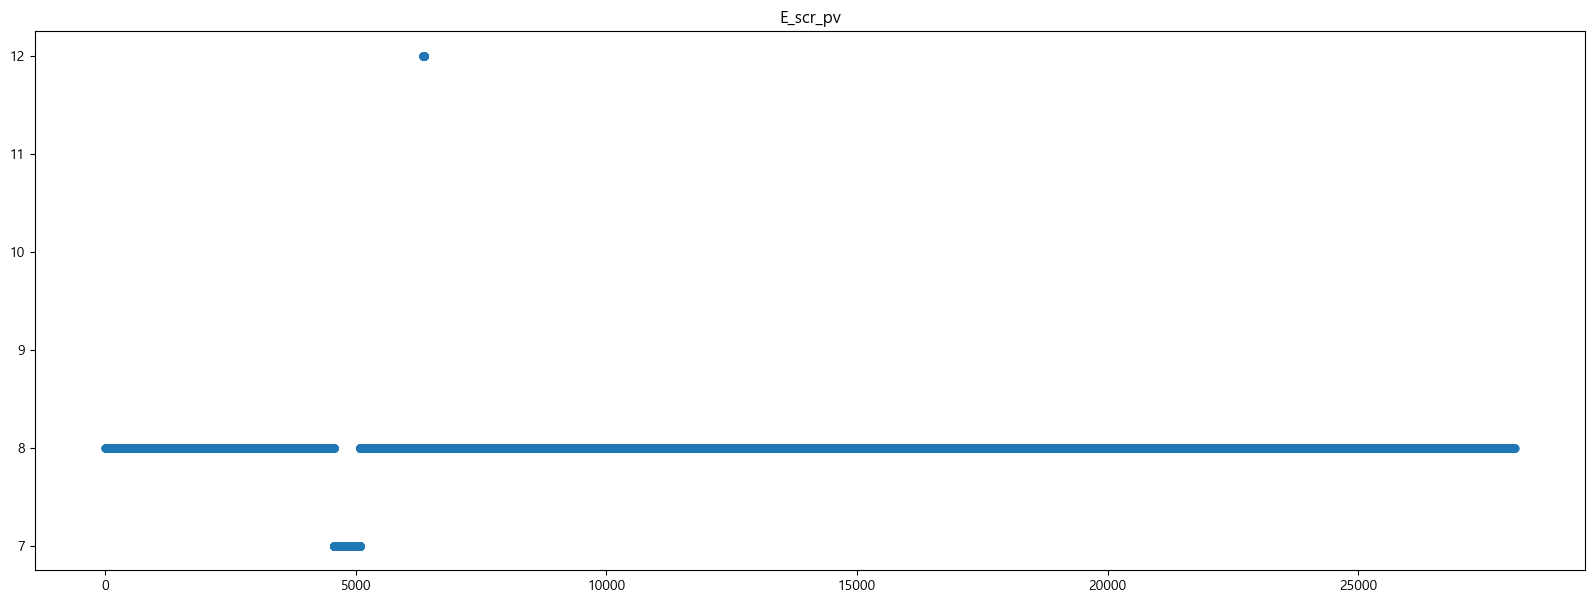

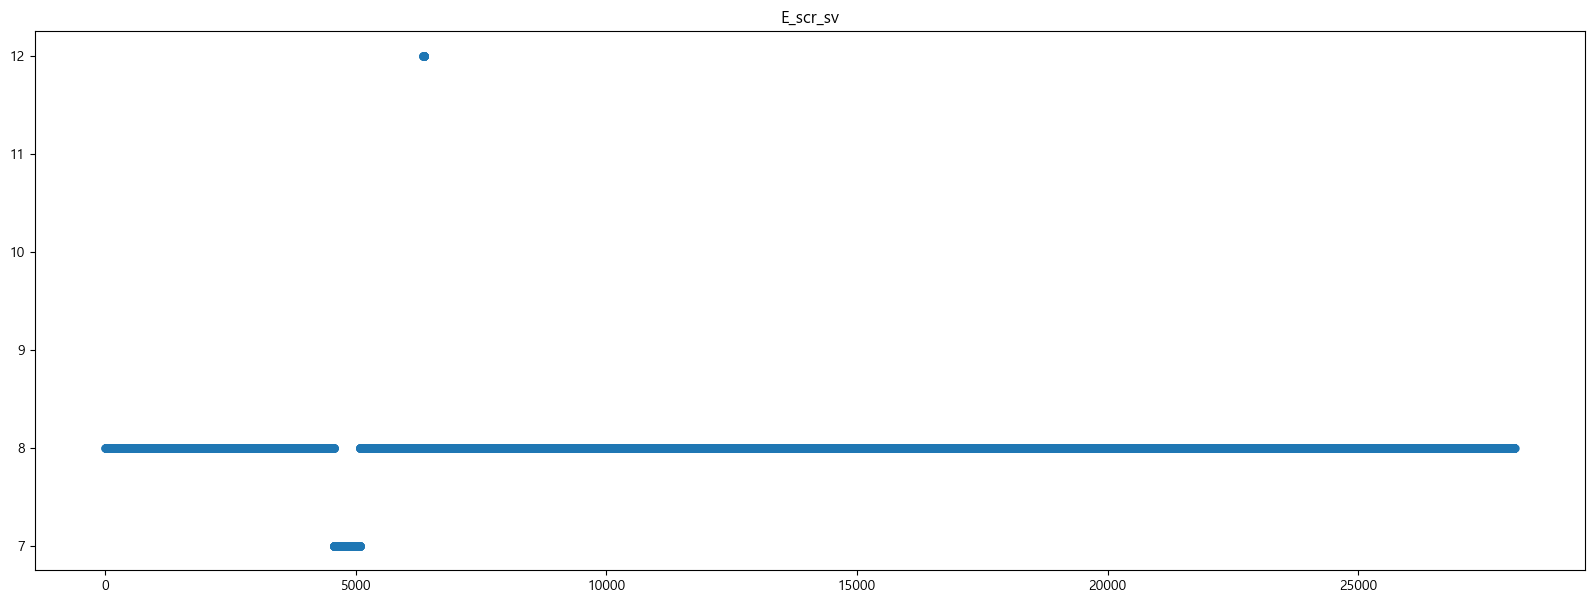

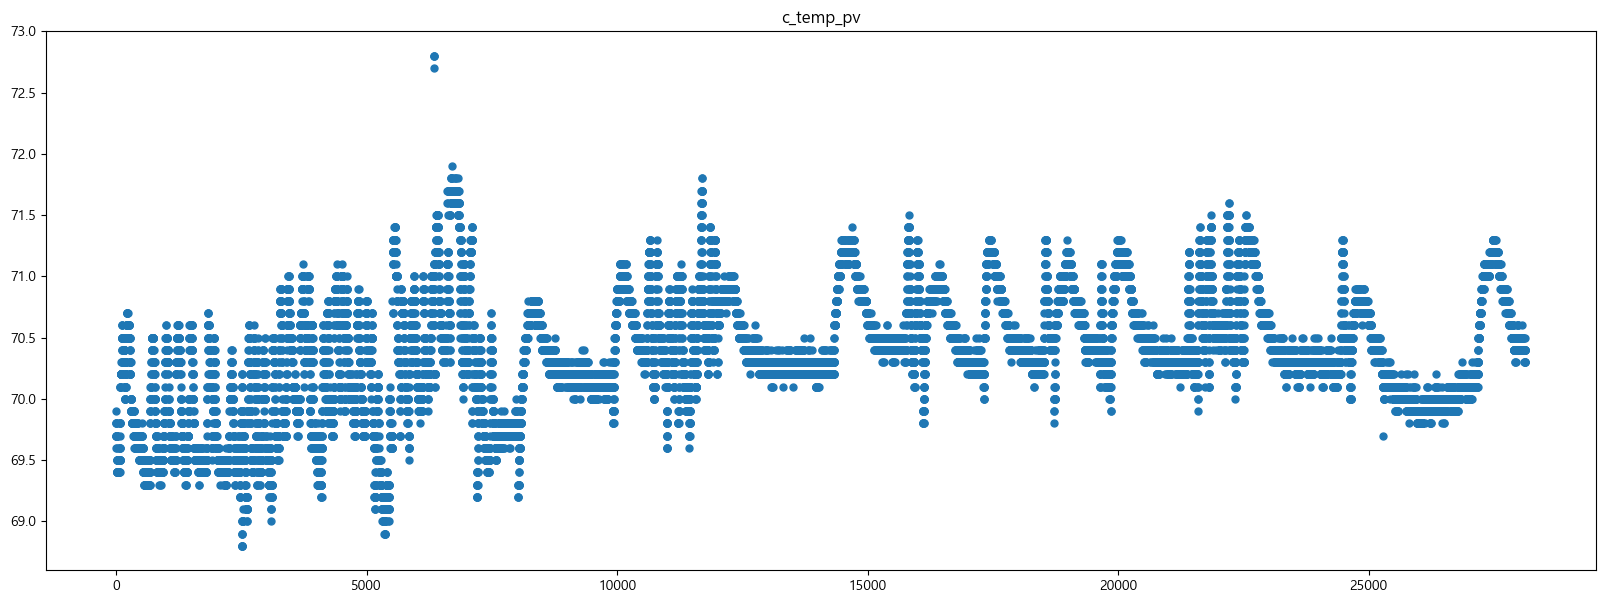

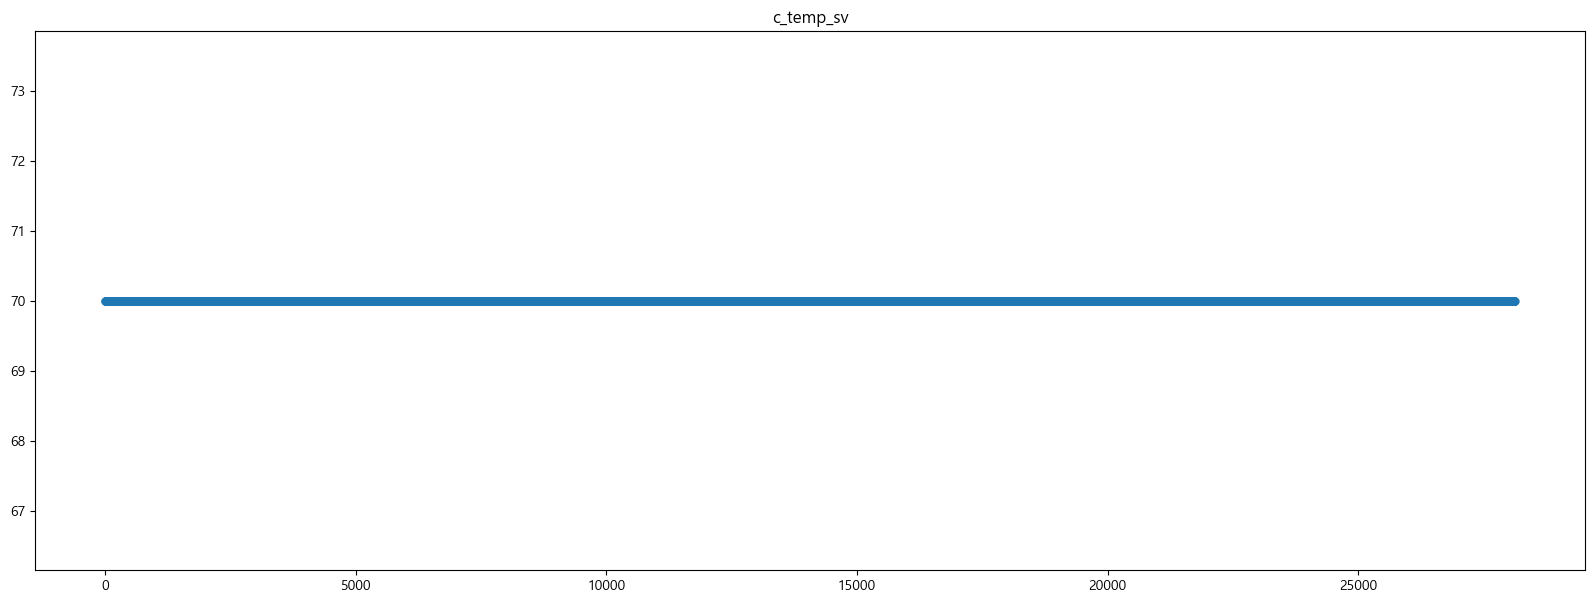

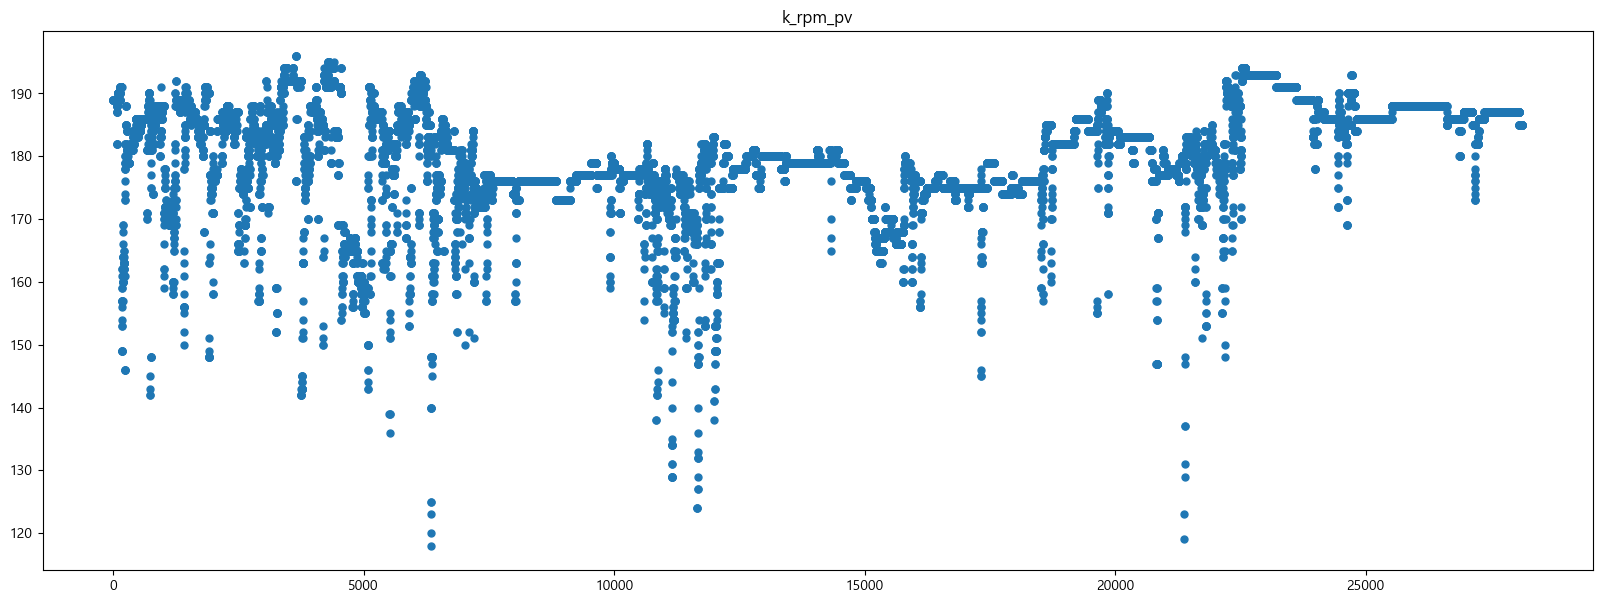

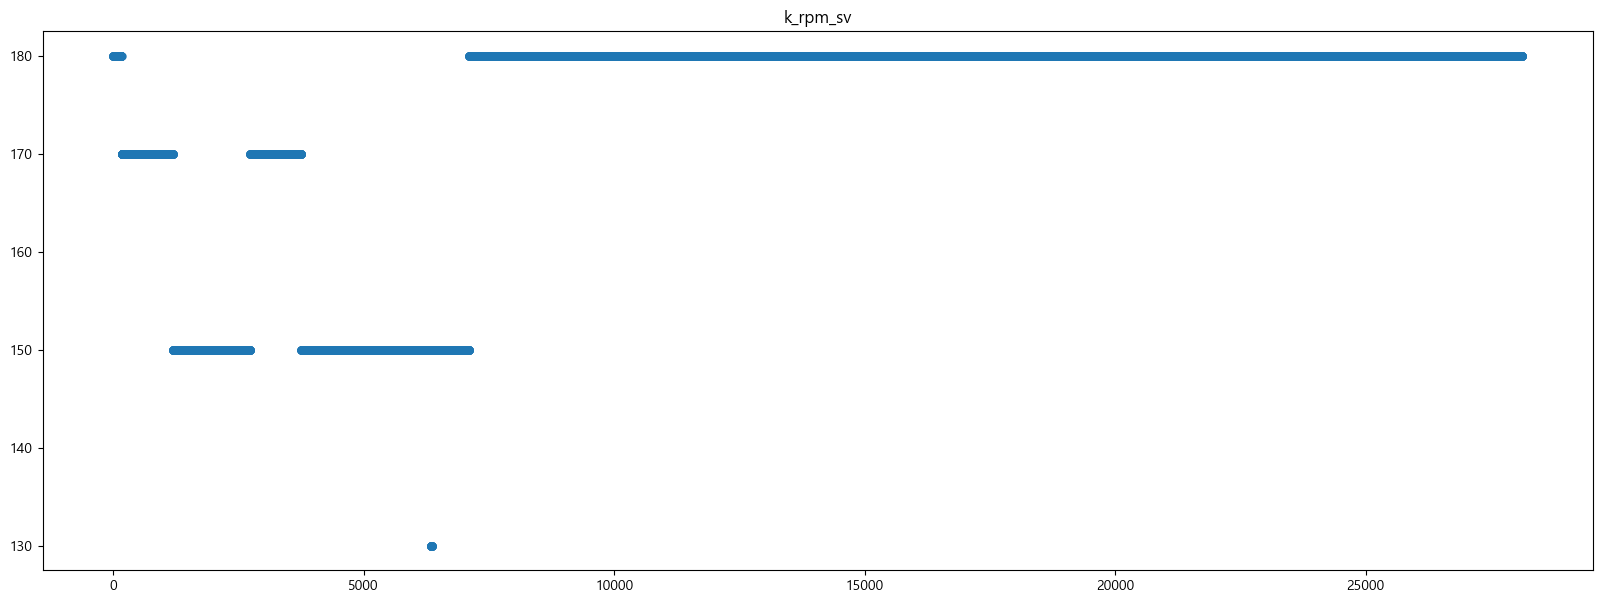

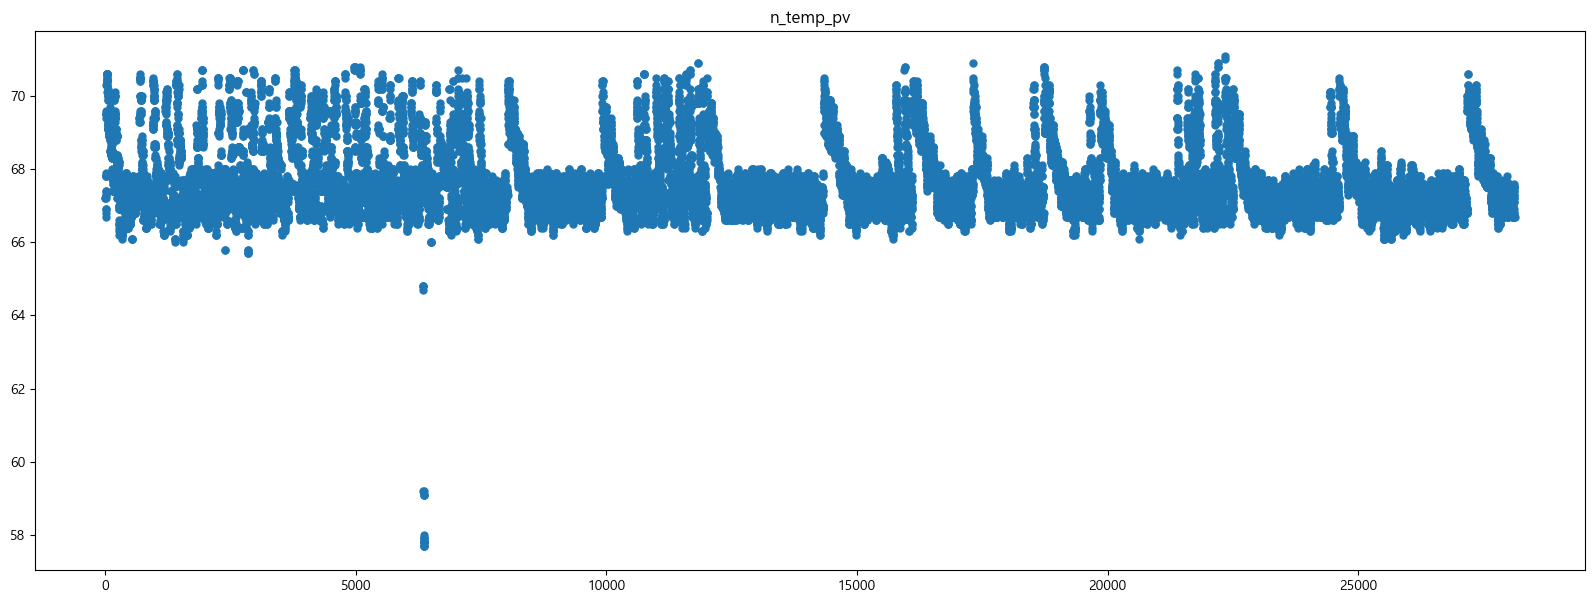

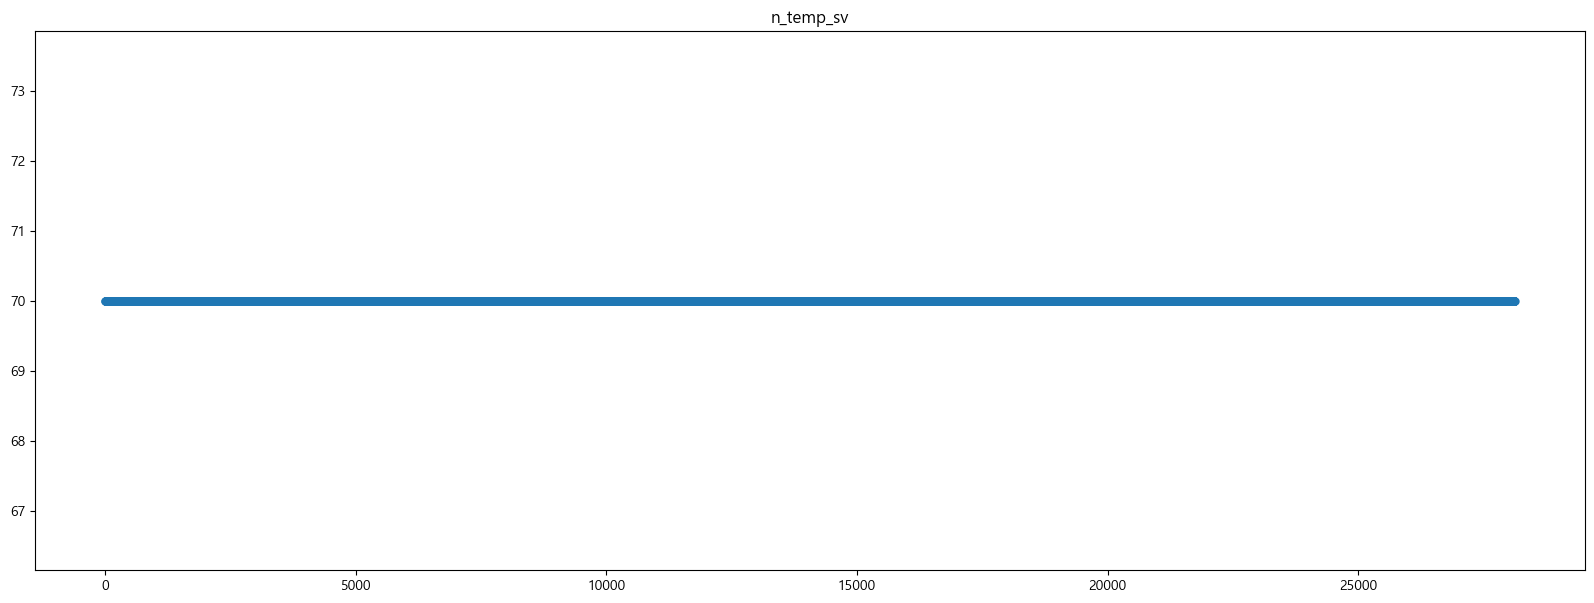

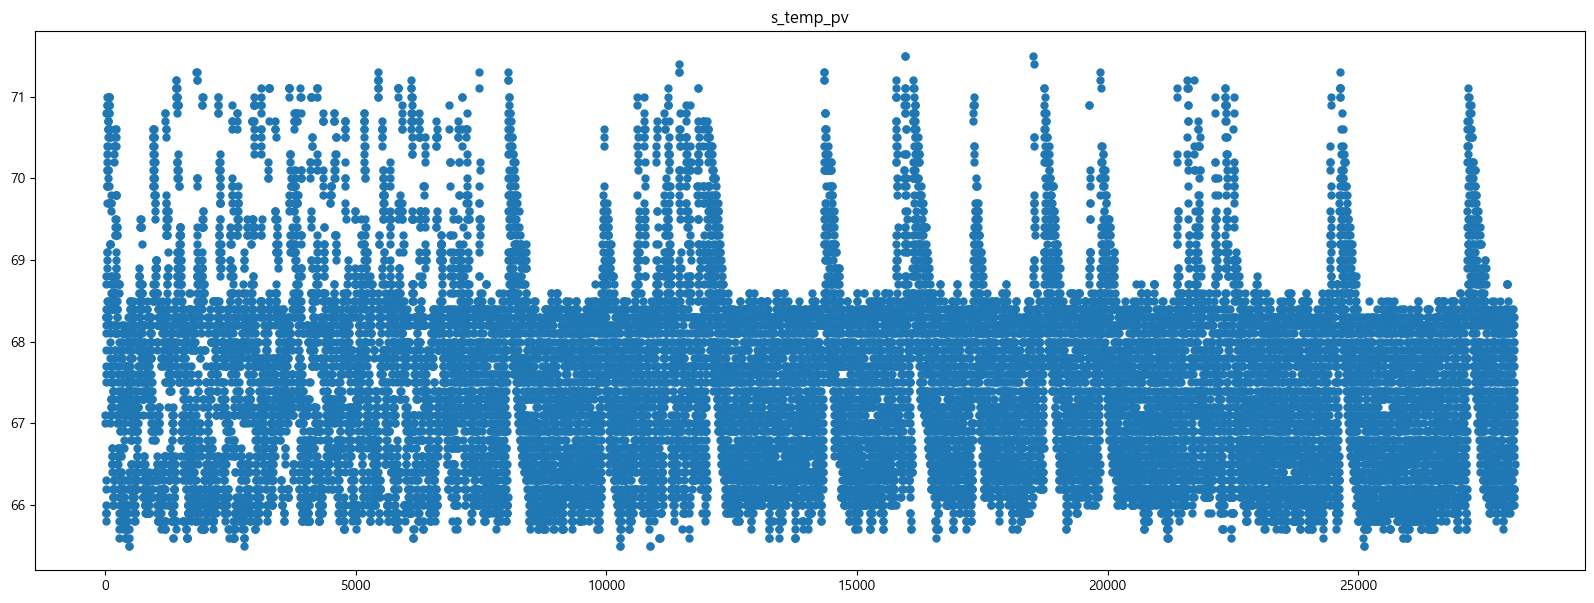

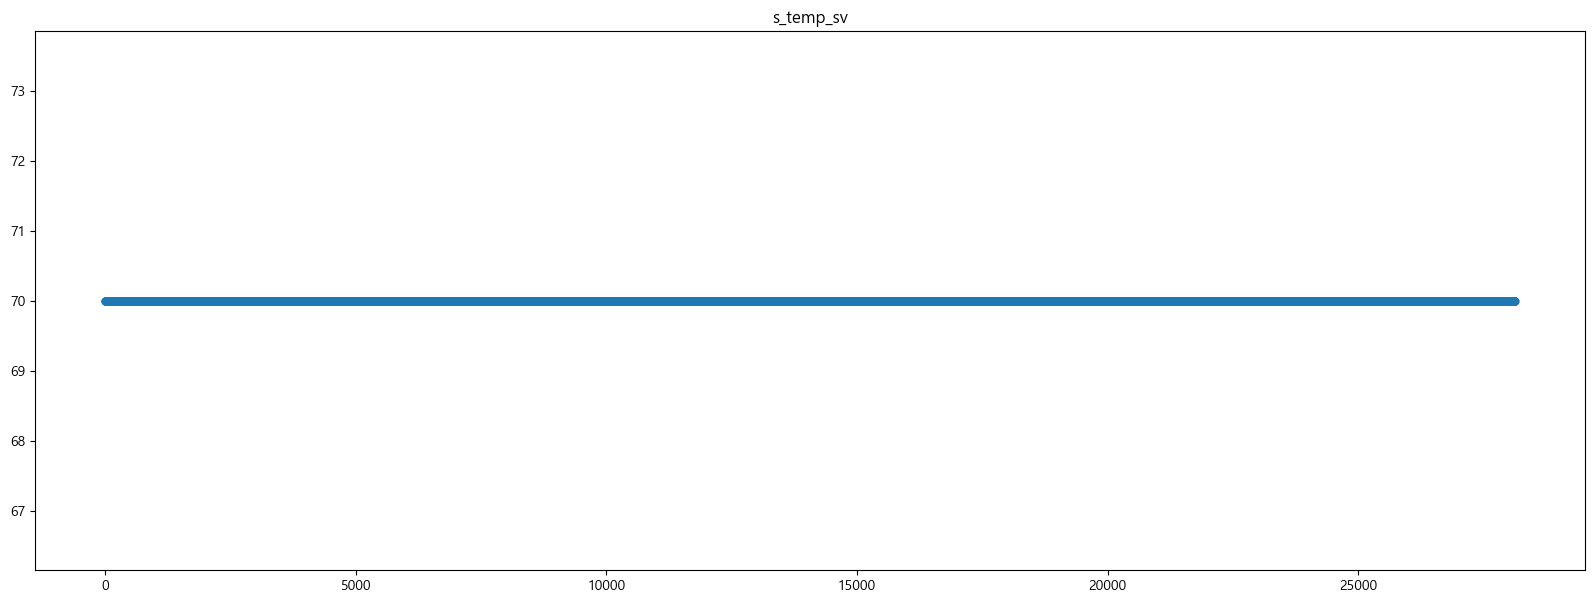

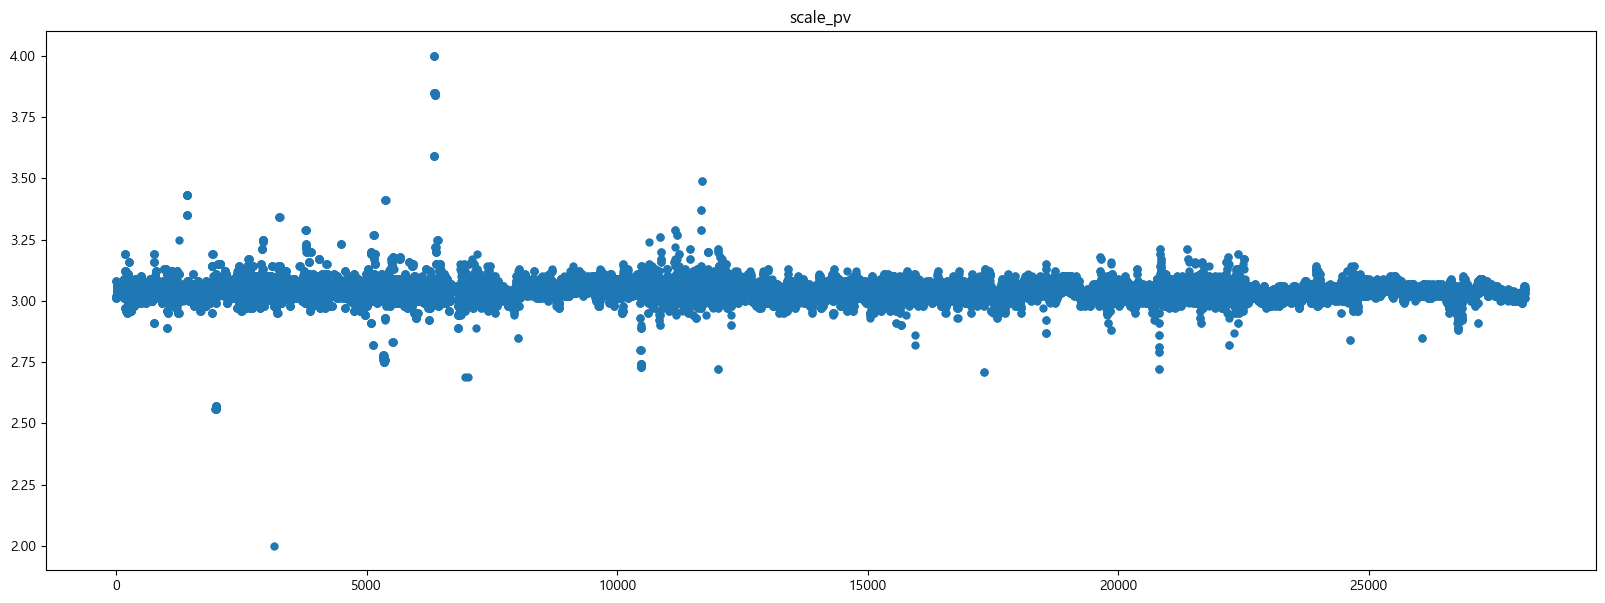

In [24]:
df3 = df2[(df2["scale_pv"]>=2)&(df2["scale_pv"]<=4)].reset_index(drop=True)
draw_boxplot(df3)
draw_point(df3)

In [25]:
df3["scale_pv"].sort_values(ascending=True)
df3.iloc[3160]

time         2023-06-08 14:33:36.950228+00:00
E_scr_pv                                    8
E_scr_sv                                    8
c_temp_pv                                70.3
c_temp_sv                                  70
k_rpm_pv                                  186
k_rpm_sv                                  170
n_temp_pv                                67.4
n_temp_sv                                  70
s_temp_pv                                68.1
s_temp_sv                                  70
scale_pv                                  2.0
Name: 3160, dtype: object

### 정규화

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_pre = df3.iloc[:,1:]
pd.DataFrame(scaler.fit_transform(df_pre), columns=df_pre.columns)

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,s_temp_pv,s_temp_sv,scale_pv
0,0.2,0.2,0.200,0.0,0.910256,1.0,0.708955,0.0,0.266667,0.0,0.505
1,0.2,0.2,0.250,0.0,0.910256,1.0,0.708955,0.0,0.250000,0.0,0.505
2,0.2,0.2,0.225,0.0,0.910256,1.0,0.761194,0.0,0.066667,0.0,0.540
3,0.2,0.2,0.225,0.0,0.910256,1.0,0.753731,0.0,0.066667,0.0,0.540
4,0.2,0.2,0.225,0.0,0.910256,1.0,0.753731,0.0,0.066667,0.0,0.540
...,...,...,...,...,...,...,...,...,...,...,...
28118,0.2,0.2,0.375,0.0,0.858974,1.0,0.671642,0.0,0.366667,0.0,0.505
28119,0.2,0.2,0.400,0.0,0.858974,1.0,0.679104,0.0,0.300000,0.0,0.515
28120,0.2,0.2,0.400,0.0,0.858974,1.0,0.671642,0.0,0.283333,0.0,0.515
28121,0.2,0.2,0.400,0.0,0.858974,1.0,0.671642,0.0,0.233333,0.0,0.530


In [53]:
# test_sr = df3[["c_temp_sv"]]
# scaler.fit_transform(test_sr)

- E_scr_pv : 스크류 실제 값 8로 일정
E_scr_sv : 스크류 설정 값 8로 일정
- c_temp_pv : 챔버 실제 온도
c_temp_sv : 챔버 설정 온도 : 70으로 일정
- k_rpm_pv : 칼날(knife) 실제 속도
k_rpm sv : 칼날(knife) 설정 속도
- n_temp_pv : 노즐(끝에 나오는 애) 실제 온도
n_temp_sv : 노즐 설정 온도
- **scale_pv**[g] : 목표값 3
    - 갑툭튀인 경우 → 아저씨가 손도 같이 올리고 있어 / 물 무게(한번씩 닦아내는 정도)
- s_temp_pv : 스크류 온도 실제 값
s_temp_sv : 스크류 온도 설정 값

In [26]:
# n = 1
# df_pre = df.copy()
# df_pre[f'{n}번째 전 데이터'] = df["k_rpm_pv"].shift(n, fill_value=0)
# df_pre

In [27]:
# df_pre = df_pre[((df_pre["scale_pv"]>=2)&(df_pre["scale_pv"]<=4)) | (df_pre["k_rpm_pv"]-df_pre["1번째 전 데이터"] != 0)] # 28142
# df_pre

# ML 시작
-> MAE, MAPE로 평가 

In [43]:
# 평가를 위한 모듈 로딩 
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_absolute_percentage_error # MAPE

def print_err(y_true, y_pred):
    print(f"MAE => {mean_absolute_error(y_true, y_pred)}")
    print(f"MAPE => {mean_absolute_percentage_error(y_true, y_pred)}")

In [54]:
from sklearn.model_selection import train_test_split # train, test 나누기
featureDF = df_pre.iloc[:,1:-1]
targetSR = df_pre.iloc[:,-1]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, 
                                                    test_size=0.2,random_state = 42)

# Multiple Regression


In [56]:
from sklearn.linear_model import LinearRegression
model_MR = LinearRegression() 

In [57]:
model_MR.fit(X_train,y_train)
model_MR.score(X_train,y_train) # 예측의 결정계수 반환 

0.15747572045418967

In [59]:
model_MR.score(X_test,y_test)

0.20377436494998724

In [60]:
pred_y_MR = model_MR.predict(X_train)
print("train")
print_err(y_train, pred_y_MR)

train
MAE => 0.02846821607741707
MAPE => 0.009376825943208544


In [61]:
pred_y_MR = model_MR.predict(X_test)
print("test")
print_err(y_test, pred_y_MR)

test
MAE => 0.02844713701826784
MAPE => 0.009351912603746564


# Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor() 

In [67]:
model_RF.fit(X_train,y_train)
model_RF.score(X_train,y_train) # 예측의 결정계수 반환 

0.9187007530813318

In [68]:
model_RF.score(X_test,y_test)

0.5684377896919459

In [69]:
pred_y_RF = model_RF.predict(X_train)
print("train")
print_err(y_train, pred_y_RF)

train
MAE => 0.008495393324937999
MAPE => 0.0027971689831792494


In [70]:
pred_y_RF = model_RF.predict(X_test)
print("test")
print_err(y_test, pred_y_RF)

test
MAE => 0.019637762091538037
MAPE => 0.0064811665096192045


# LightGBM

In [76]:
import lightgbm as lgbm

In [77]:
# !pip install lightgbm

In [79]:
train_ds = lgbm.Dataset(X_train, label= y_train)
test_ds = lgbm.Dataset(X_test, label= y_test)

param = {
    'boosting' : 'gbdt',
    'objective' : 'regression',
    'metric' : 'rmse',
    'seed' : 42,
    'is_training_metric' : True,
    'learning_rate' : 0.05,
    'feature_fraction' : 0.75,
    'bagging_fraction' : 0.8,
    'bagging_freq' : 16,
    'num_leaves' : 128,
    'verbosity' : -1
}

model_lgbm = lgbm.train(params=param, train_set=train_ds)

In [82]:
# 모델 평가 
pred_y_lgbm = model_lgbm.predict(X_train)
print("train")
print_err(y_train, pred_y_lgbm)

train
MAE => 0.021821836614681258
MAPE => 0.007179531886854367


In [84]:
pred_y_lgbm = model_lgbm.predict(X_test)
print("test")
print_err(y_test, pred_y_lgbm)

test
MAE => 0.023583017020660298
MAPE => 0.007766593197231986
